In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import pearsonr as pcor

Size of gene sets.

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

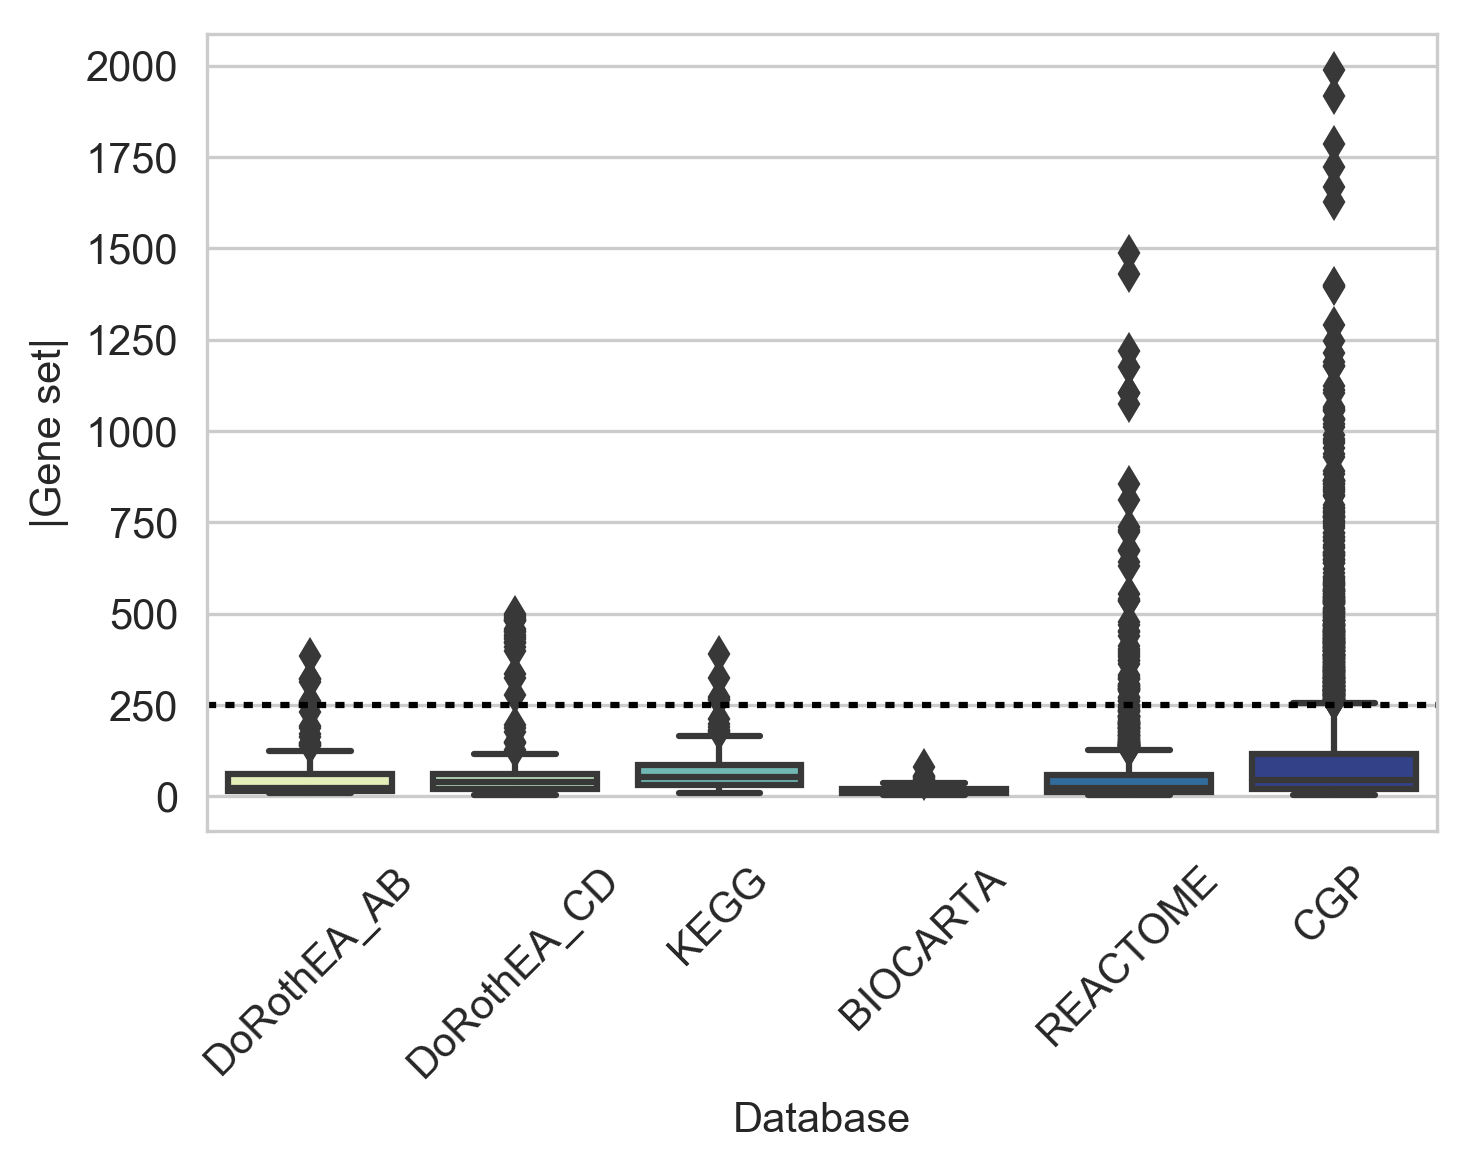

In [4]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

Gene set similarity

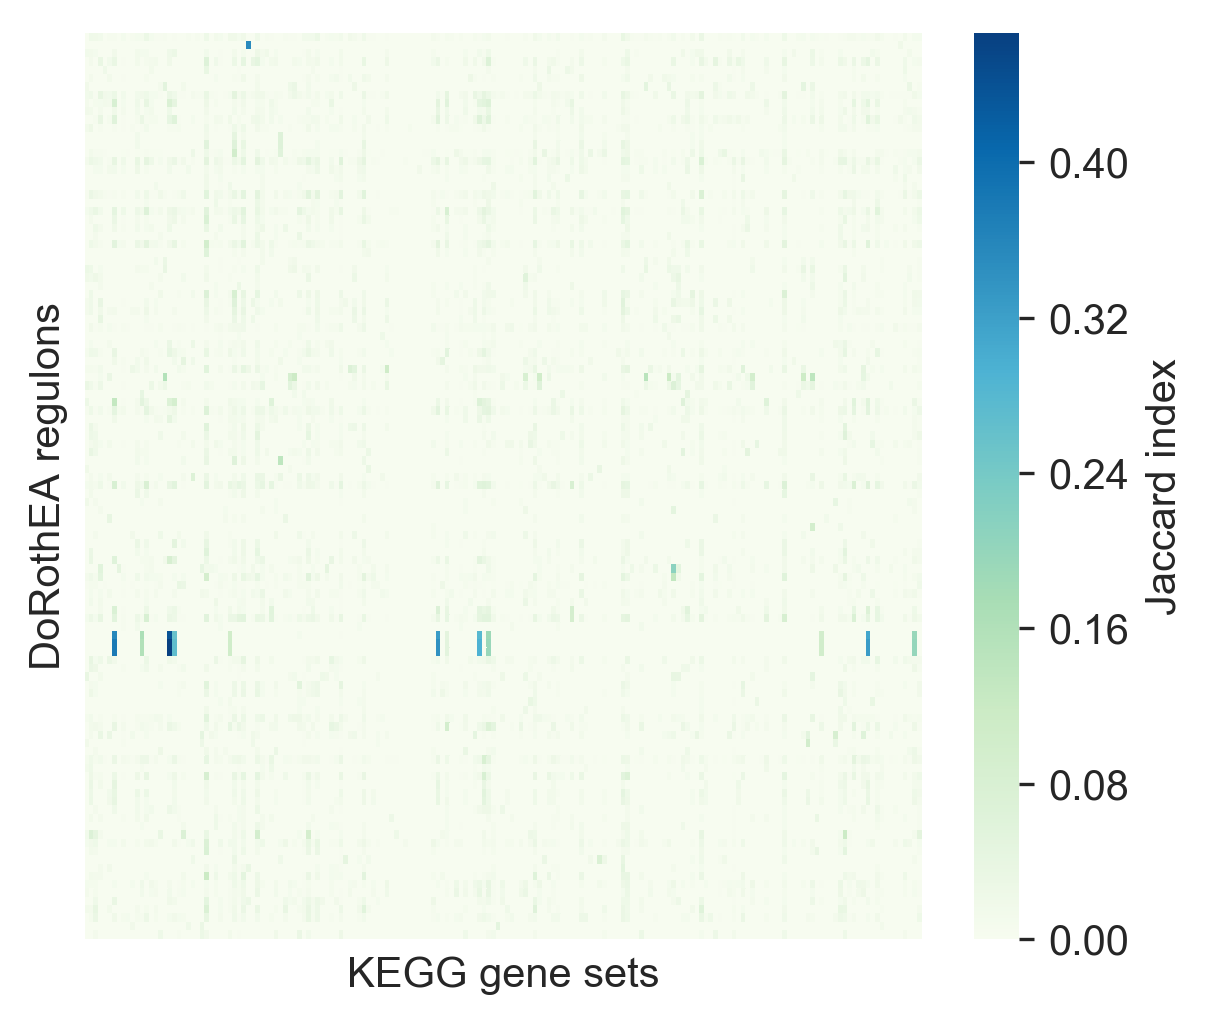

In [41]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_KEGG_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu',cbar_kws={'label': 'Jaccard index'})
plt.xticks([])
plt.yticks([])
plt.xlabel('KEGG gene sets')
plt.ylabel('DoRothEA regulons')
plt.savefig('../figures/raw/Fig2A.pdf')

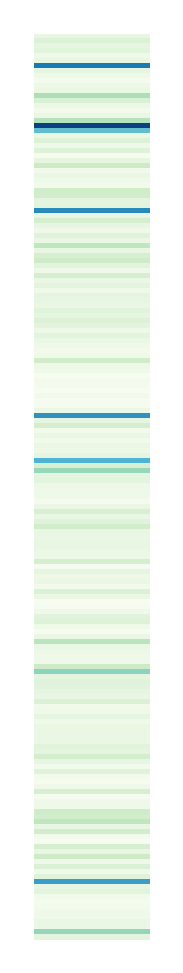

In [46]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

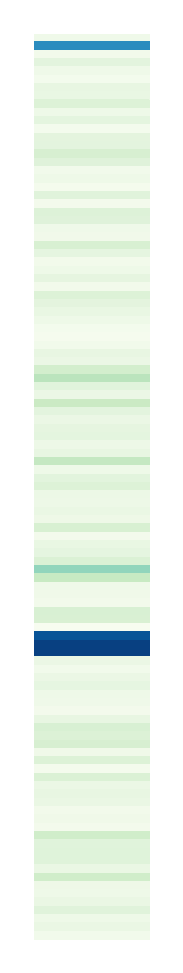

In [47]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

Gene set similarity distribution

In [48]:
dname1='BEST_dorothea_CD'
metric='jaccard'

In [69]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Real'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(5,4),dpi=300)
    sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index')
    else:
        plt.ylabel('Overlap coefficient')
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


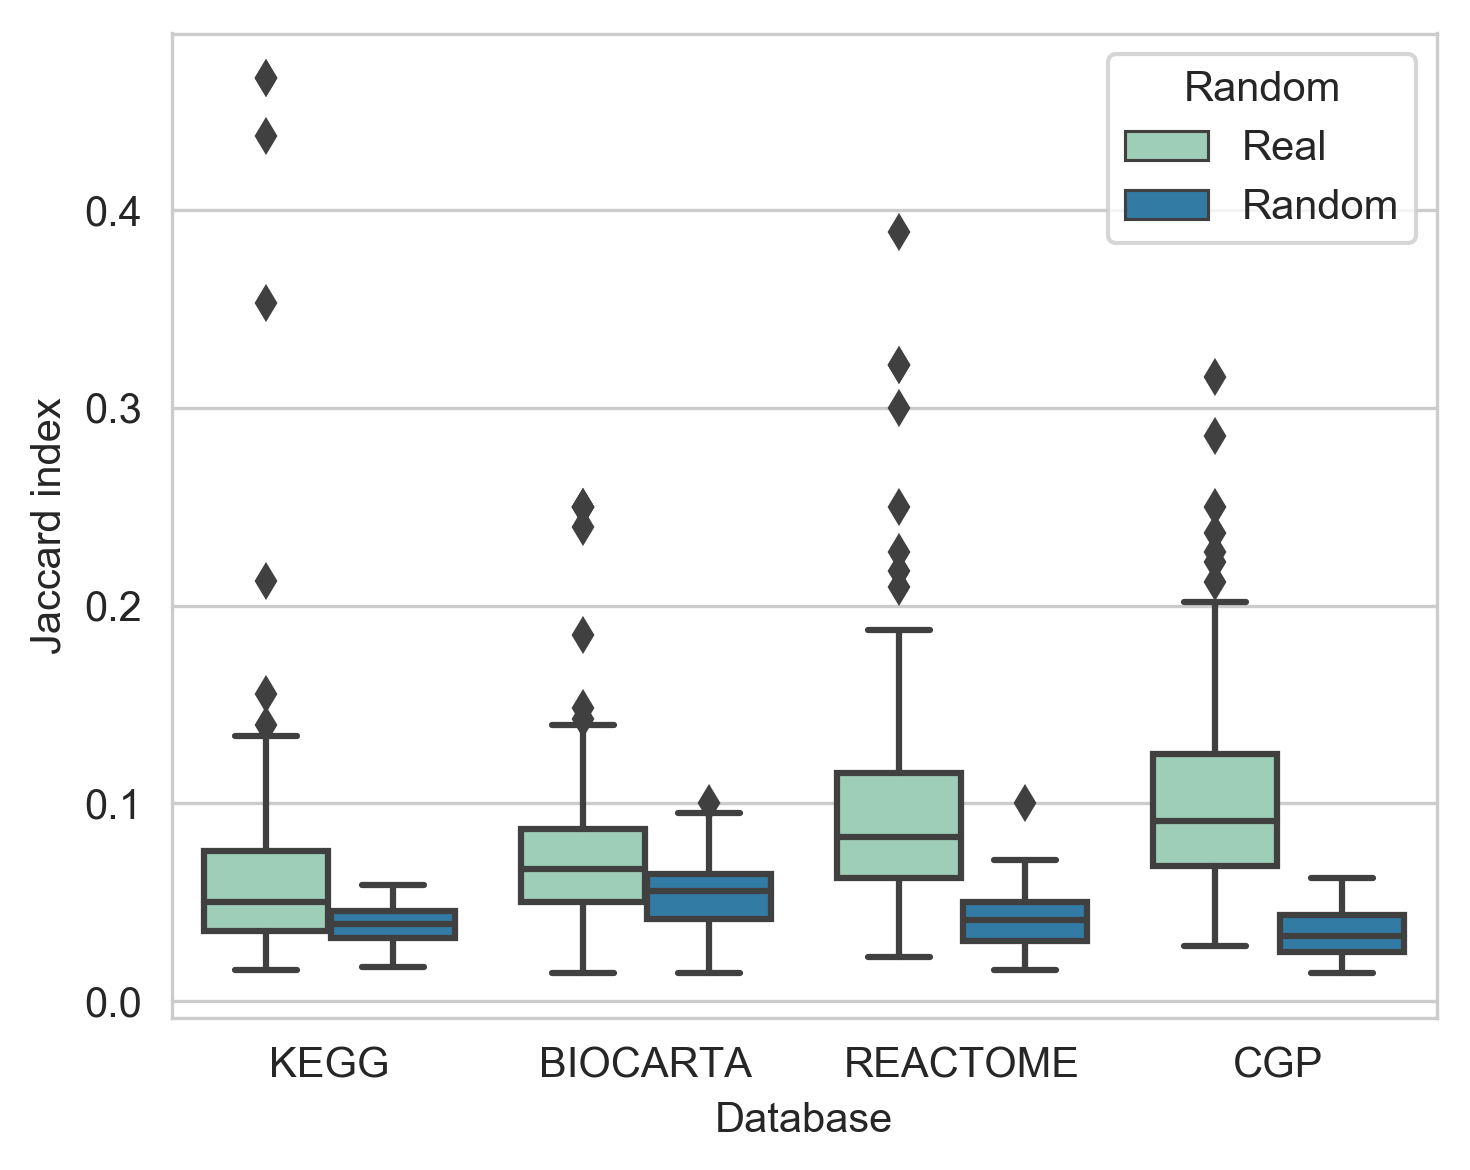

In [70]:
make_similarity_distribution('Fig2B.pdf')

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


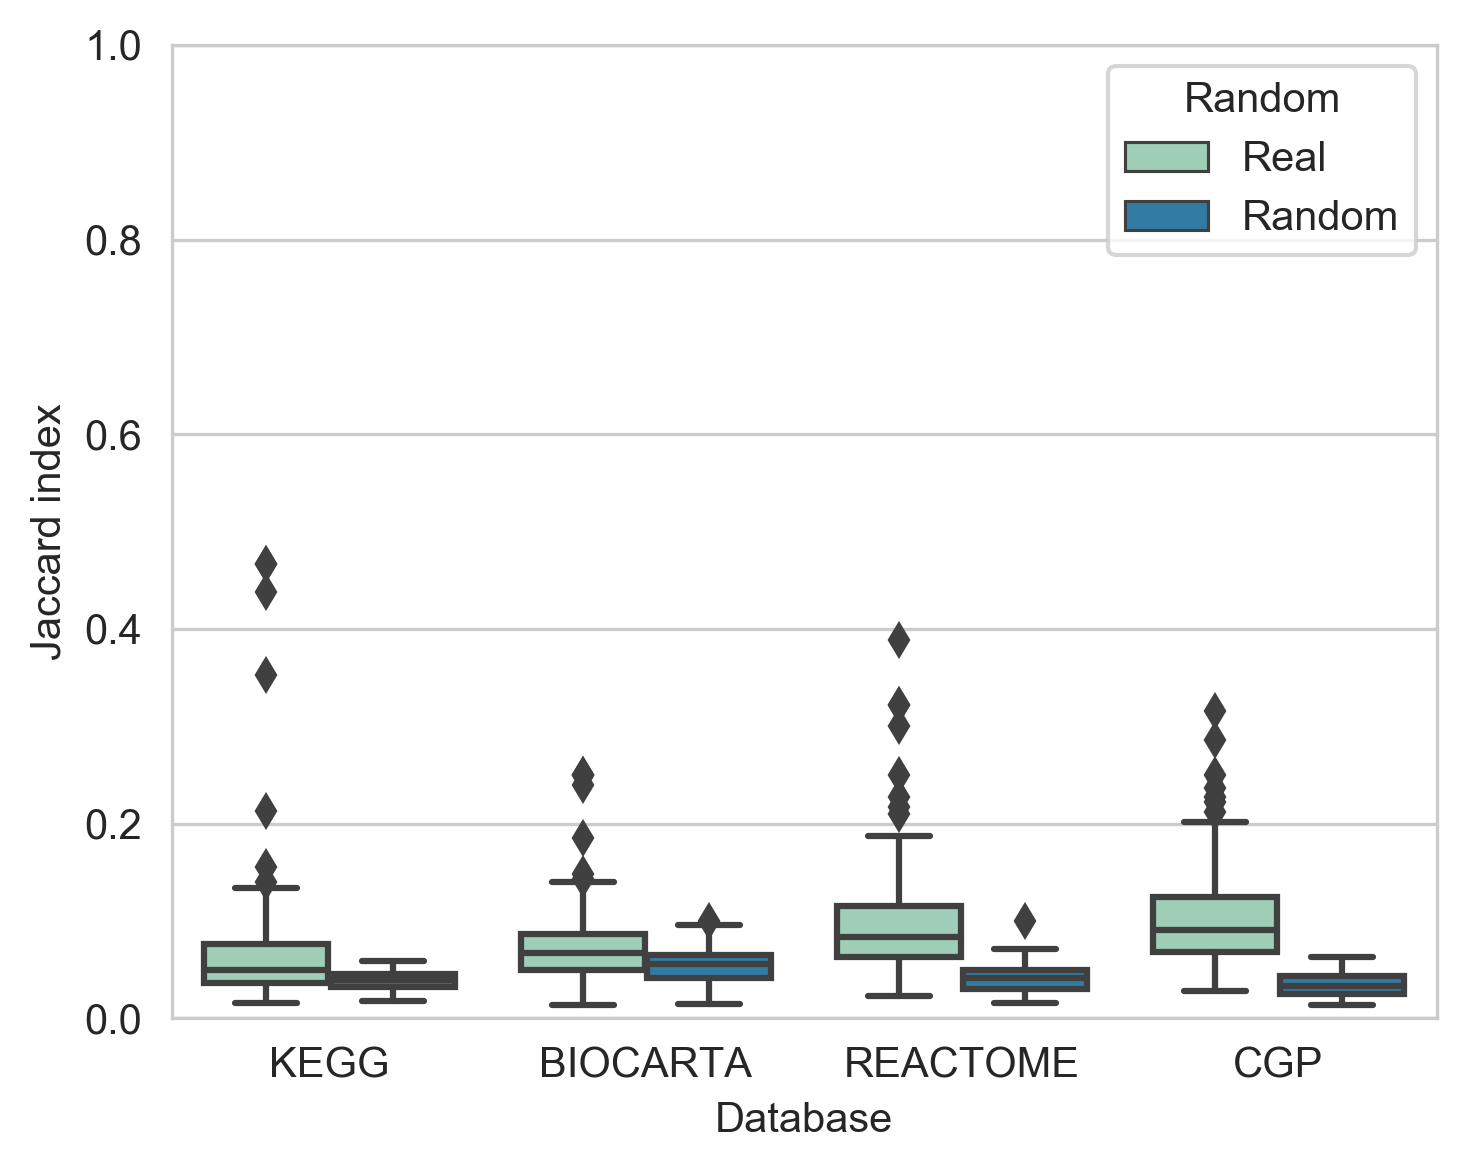

In [71]:
make_similarity_distribution('SFig2A.pdf',dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3220.0, pvalue=2.5218968221402894e-09)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=4997.0, pvalue=0.020534276748425517)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=855.5, pvalue=1.120069377082686e-28)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=261.5, pvalue=1.315089708967561e-34)


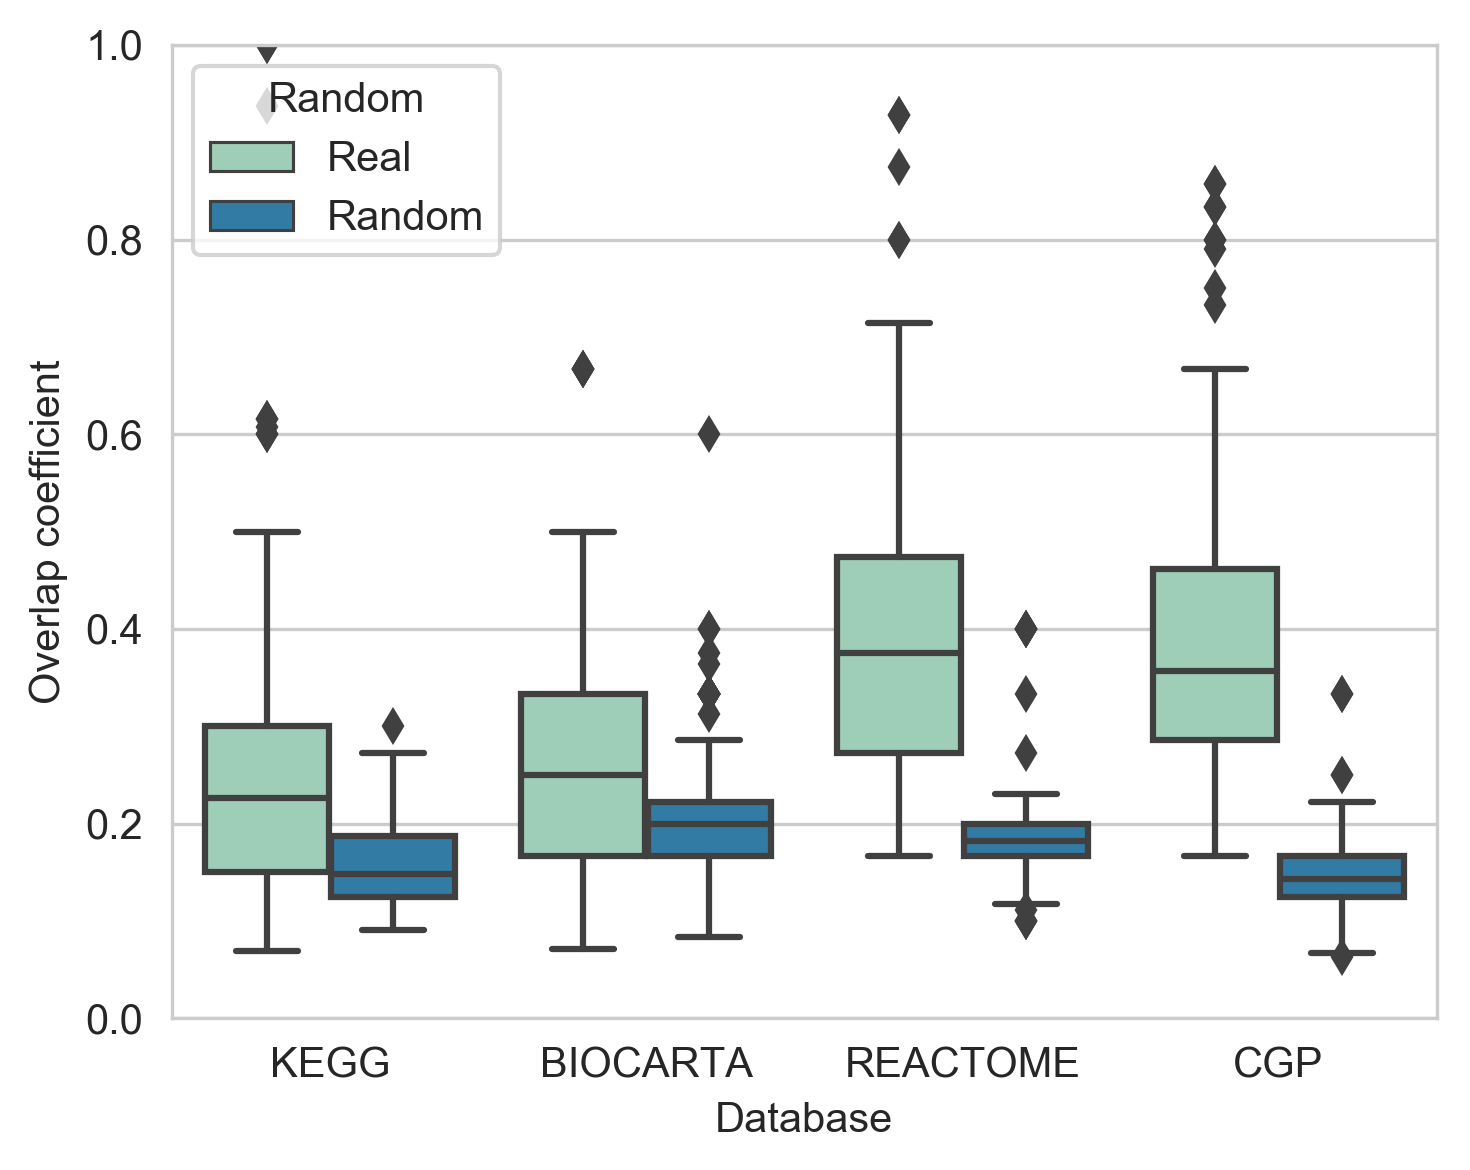

In [72]:
make_similarity_distribution('SFig2B.pdf',dname1='BEST_dorothea_AB',metric='overlap',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=26066.0, pvalue=0.001059444645452985)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=29125.5, pvalue=0.1214983383094177)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=19920.5, pvalue=2.5818771707499164e-12)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9899.0, pvalue=9.348774978947948e-40)


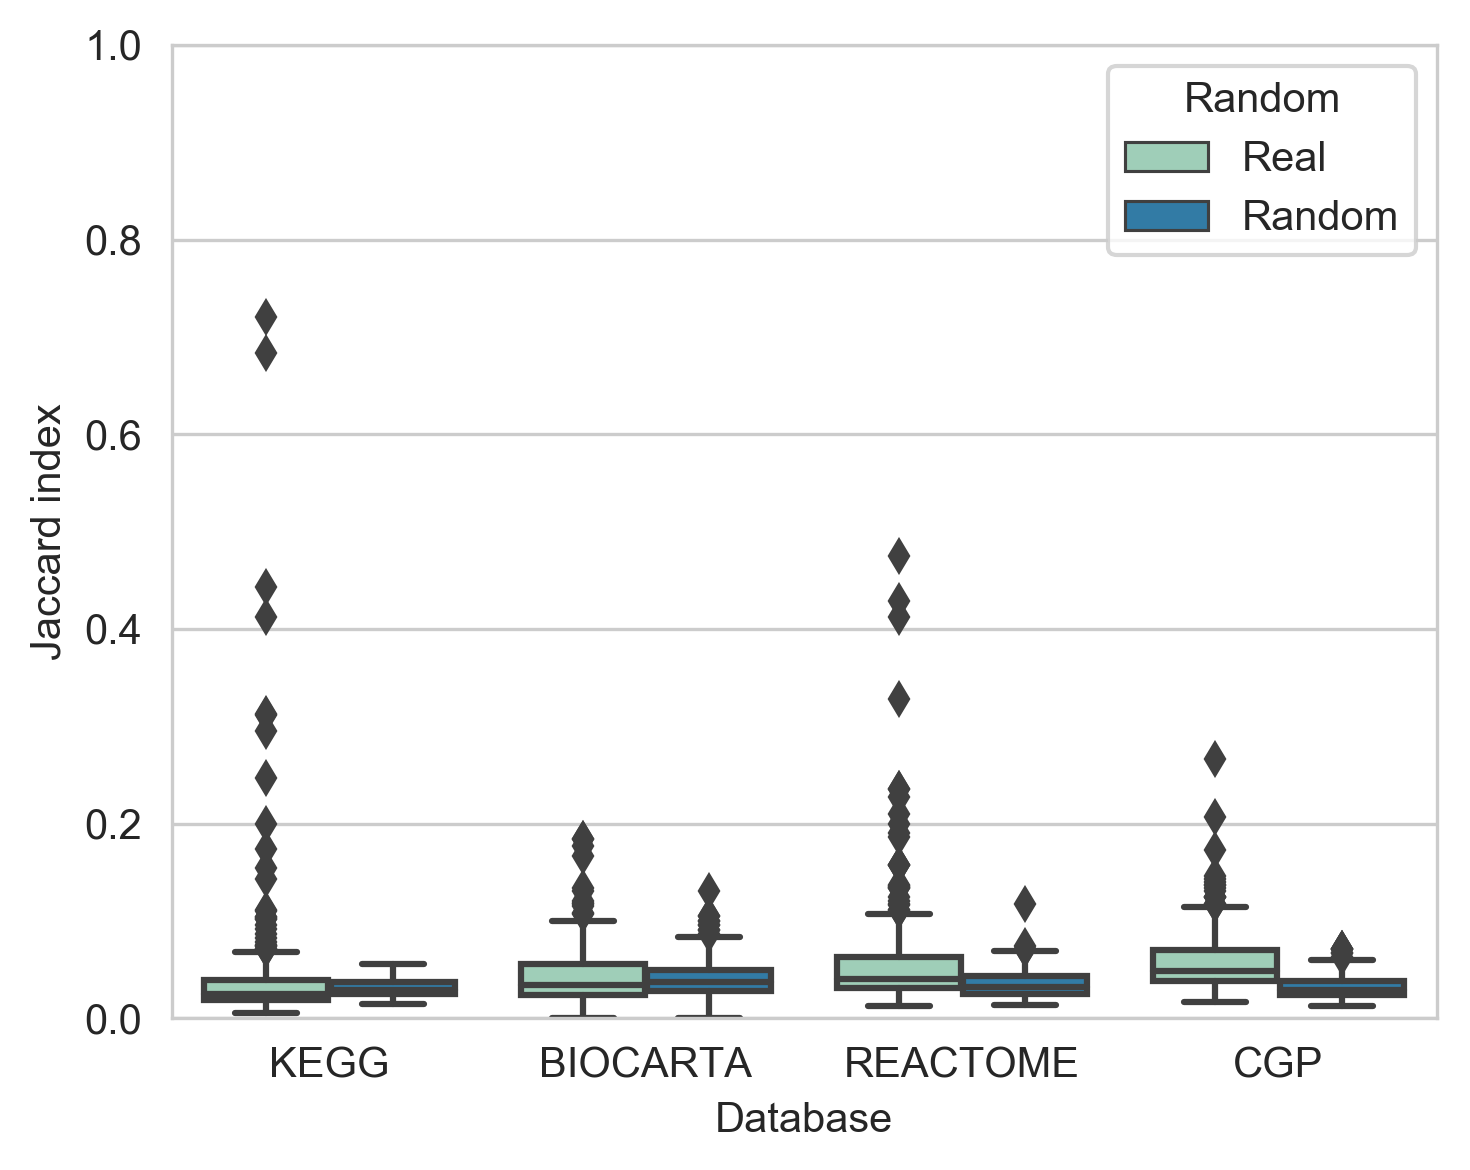

In [73]:
make_similarity_distribution('SFig2C.pdf',dname1='BEST_dorothea_CD',metric='jaccard',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=25948.0, pvalue=0.0008091049757990906)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=28088.5, pvalue=0.03289285384830791)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=16050.0, pvalue=2.331663257730446e-23)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9247.5, pvalue=5.14375156094892e-43)


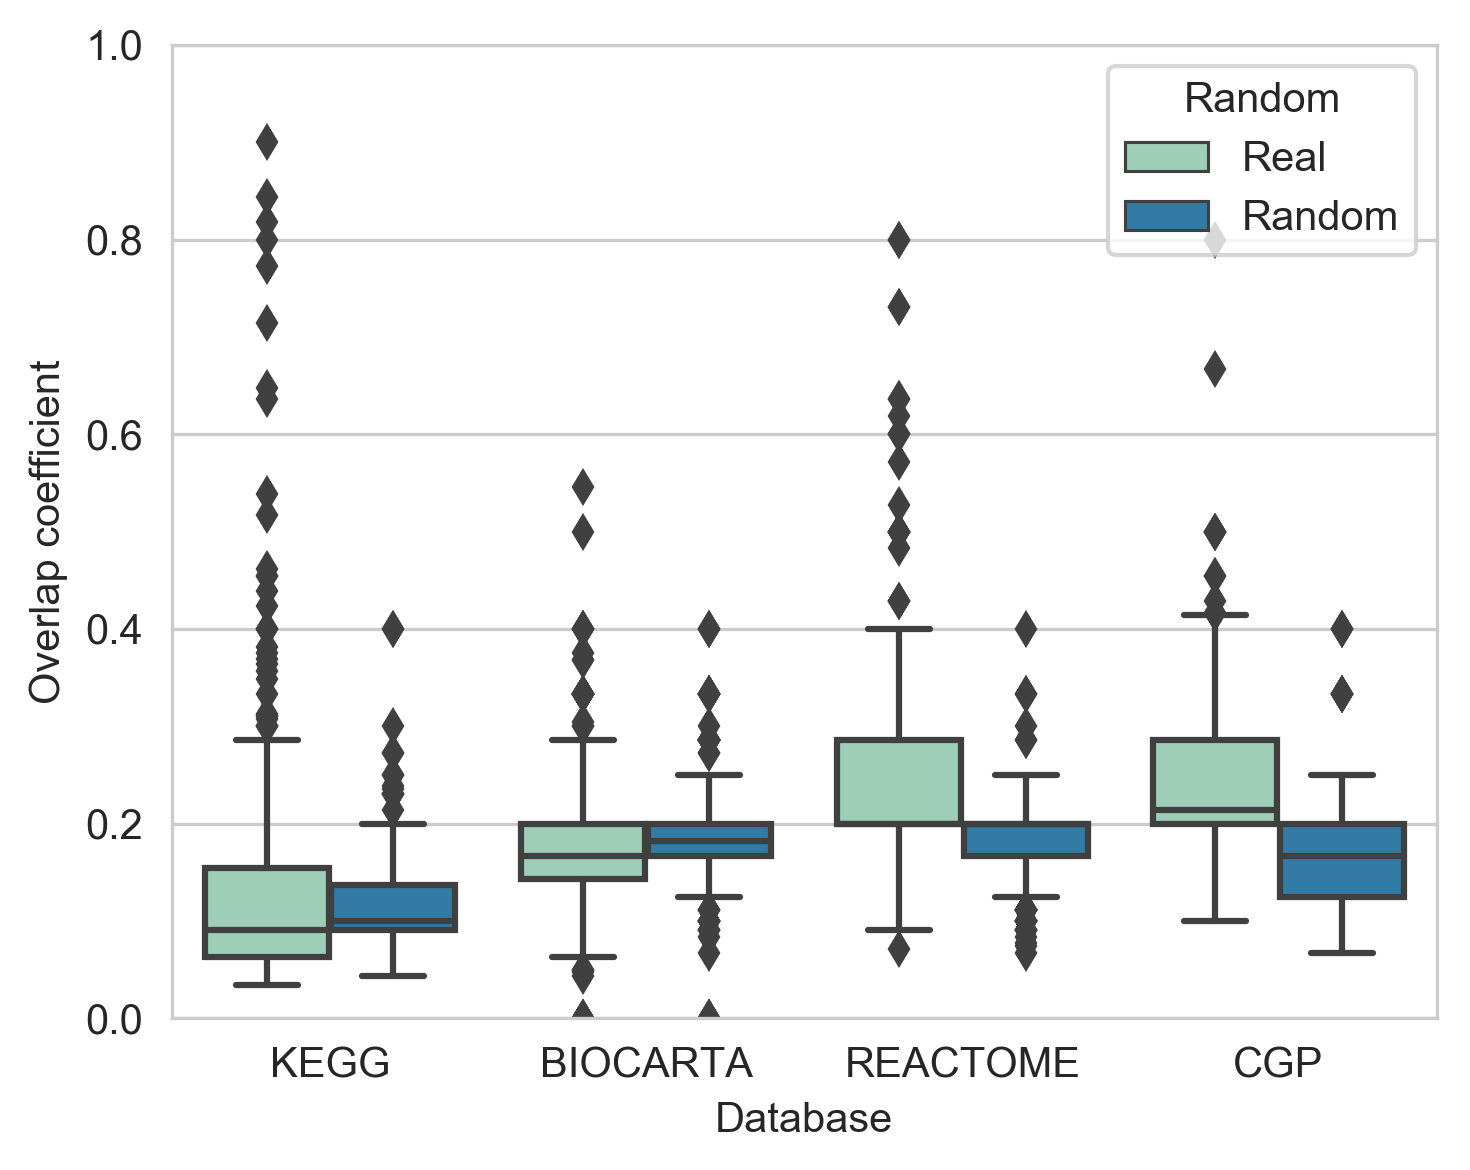

In [74]:
make_similarity_distribution('SFig2D.pdf',dname1='BEST_dorothea_CD',metric='overlap',force_ylim=True)

Shortest path distance

In [77]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [80]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [118]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance')
    plt.ylabel('Density')
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9534279550.5, pvalue=0.0)


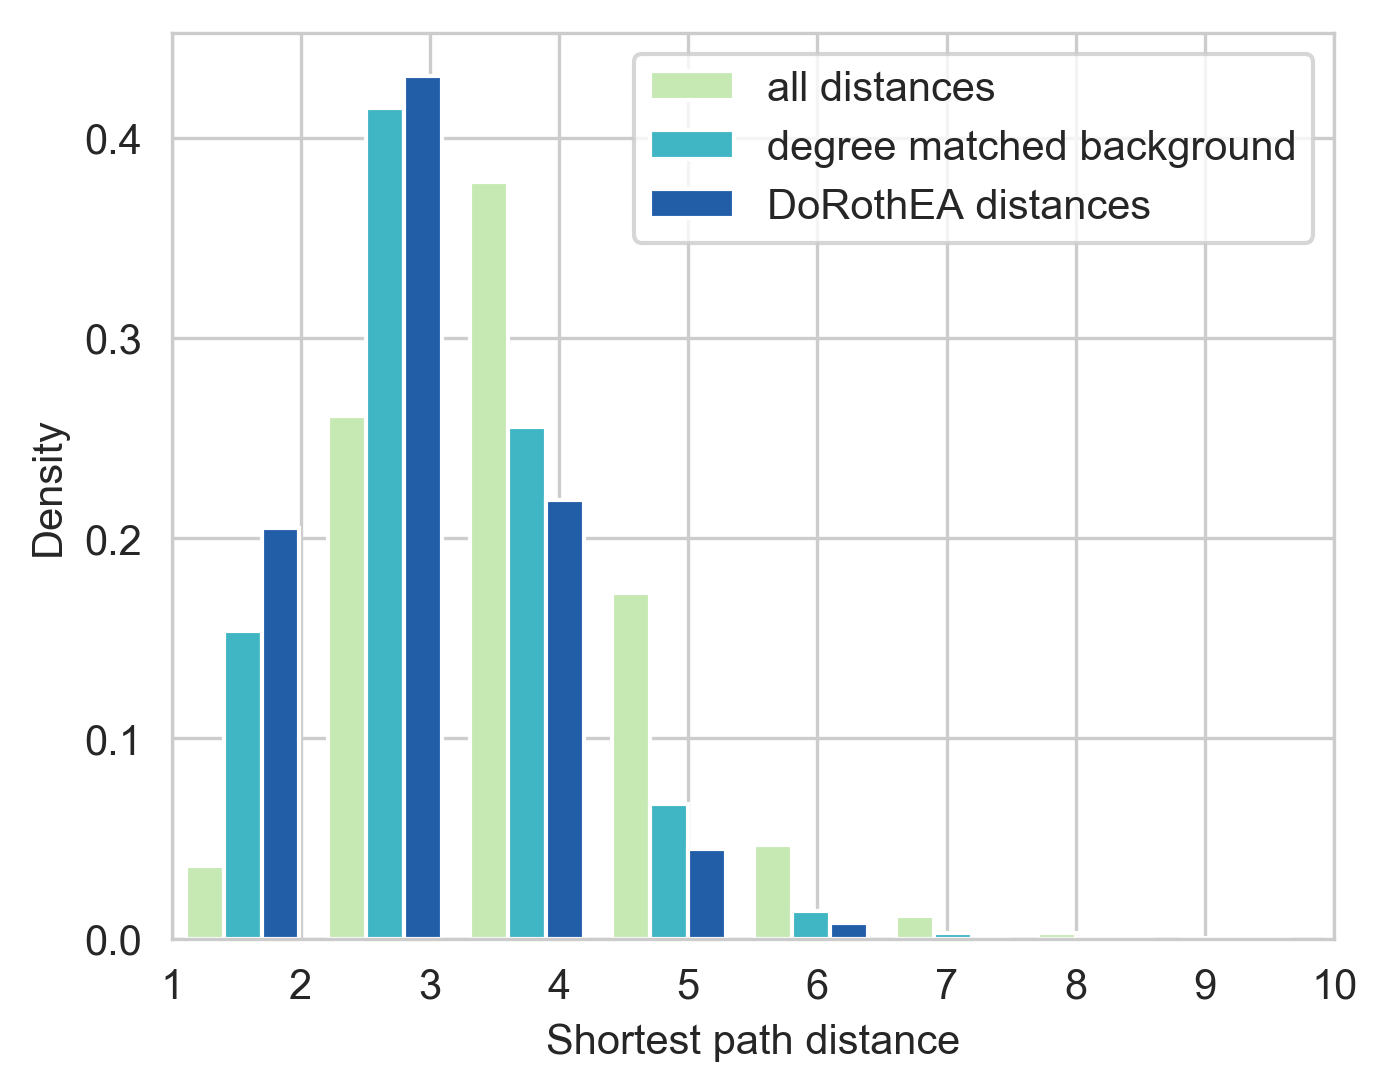

In [119]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9621477243.5, pvalue=0.0)


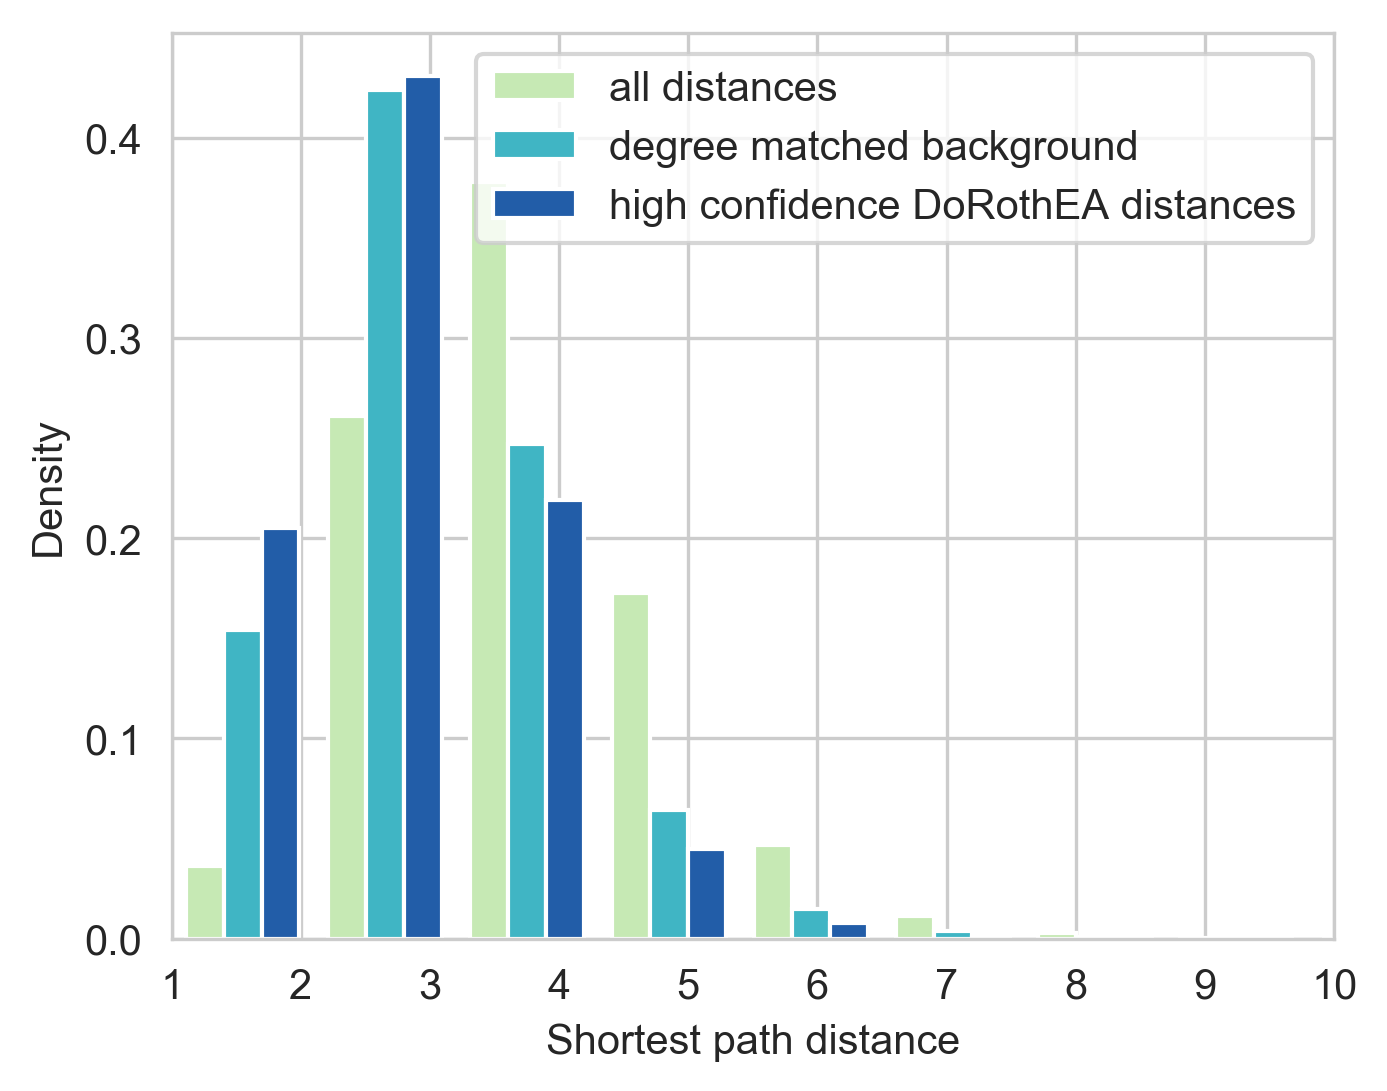

In [122]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1875202701318.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8588397534.5, pvalue=0.0)


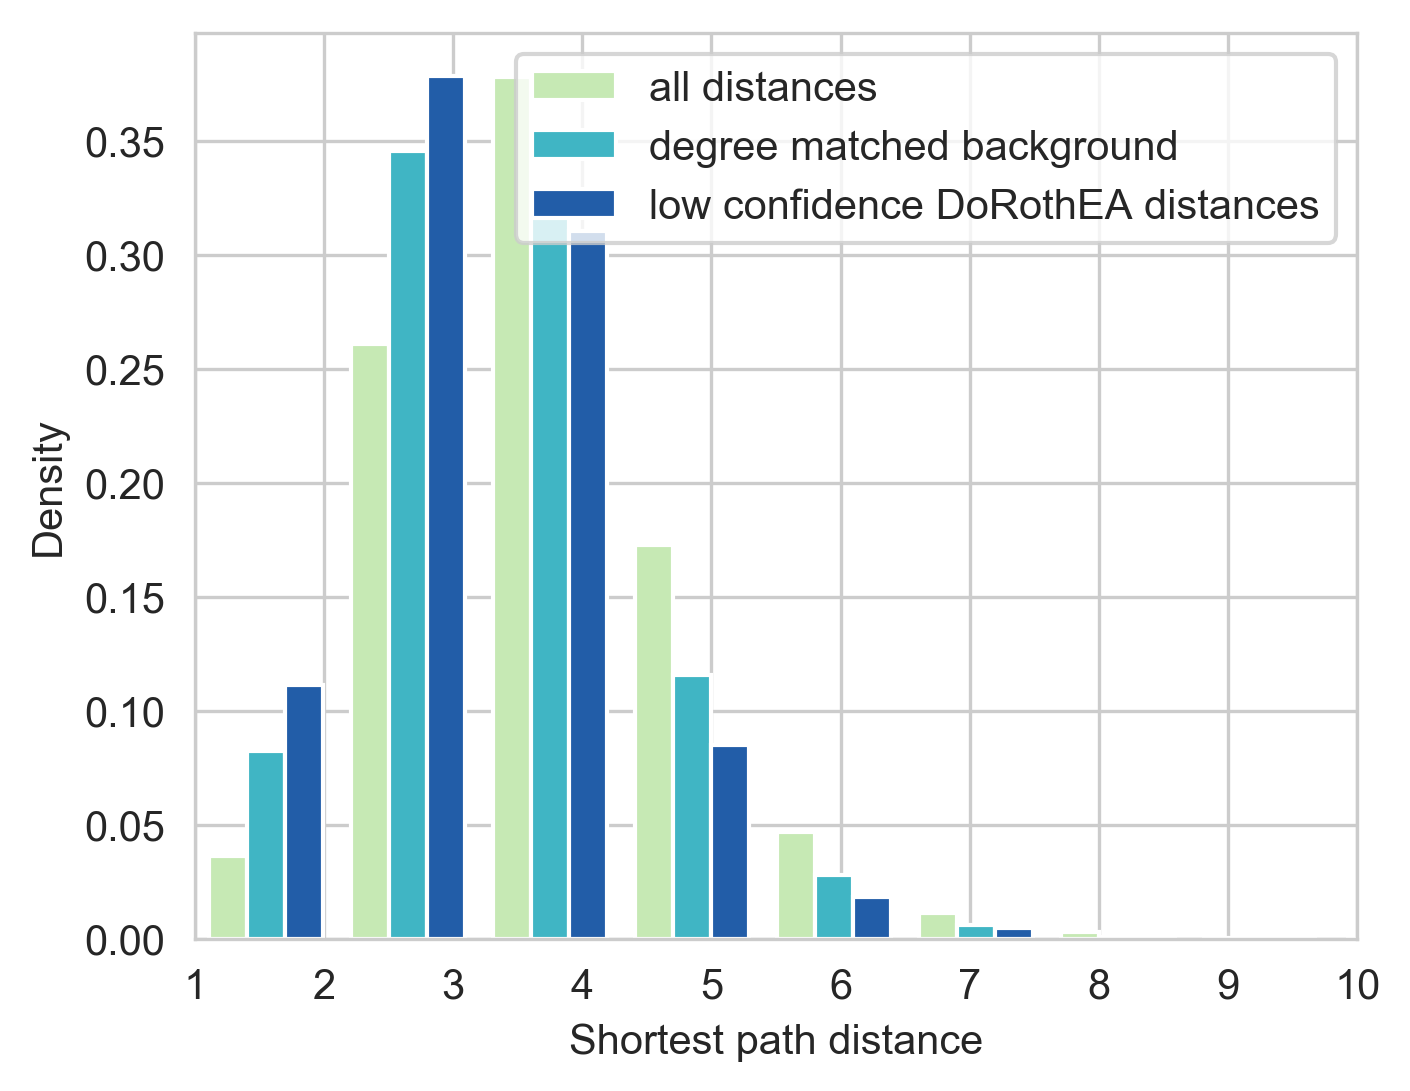

In [123]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3004285610259.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55209633449.0, pvalue=0.0)


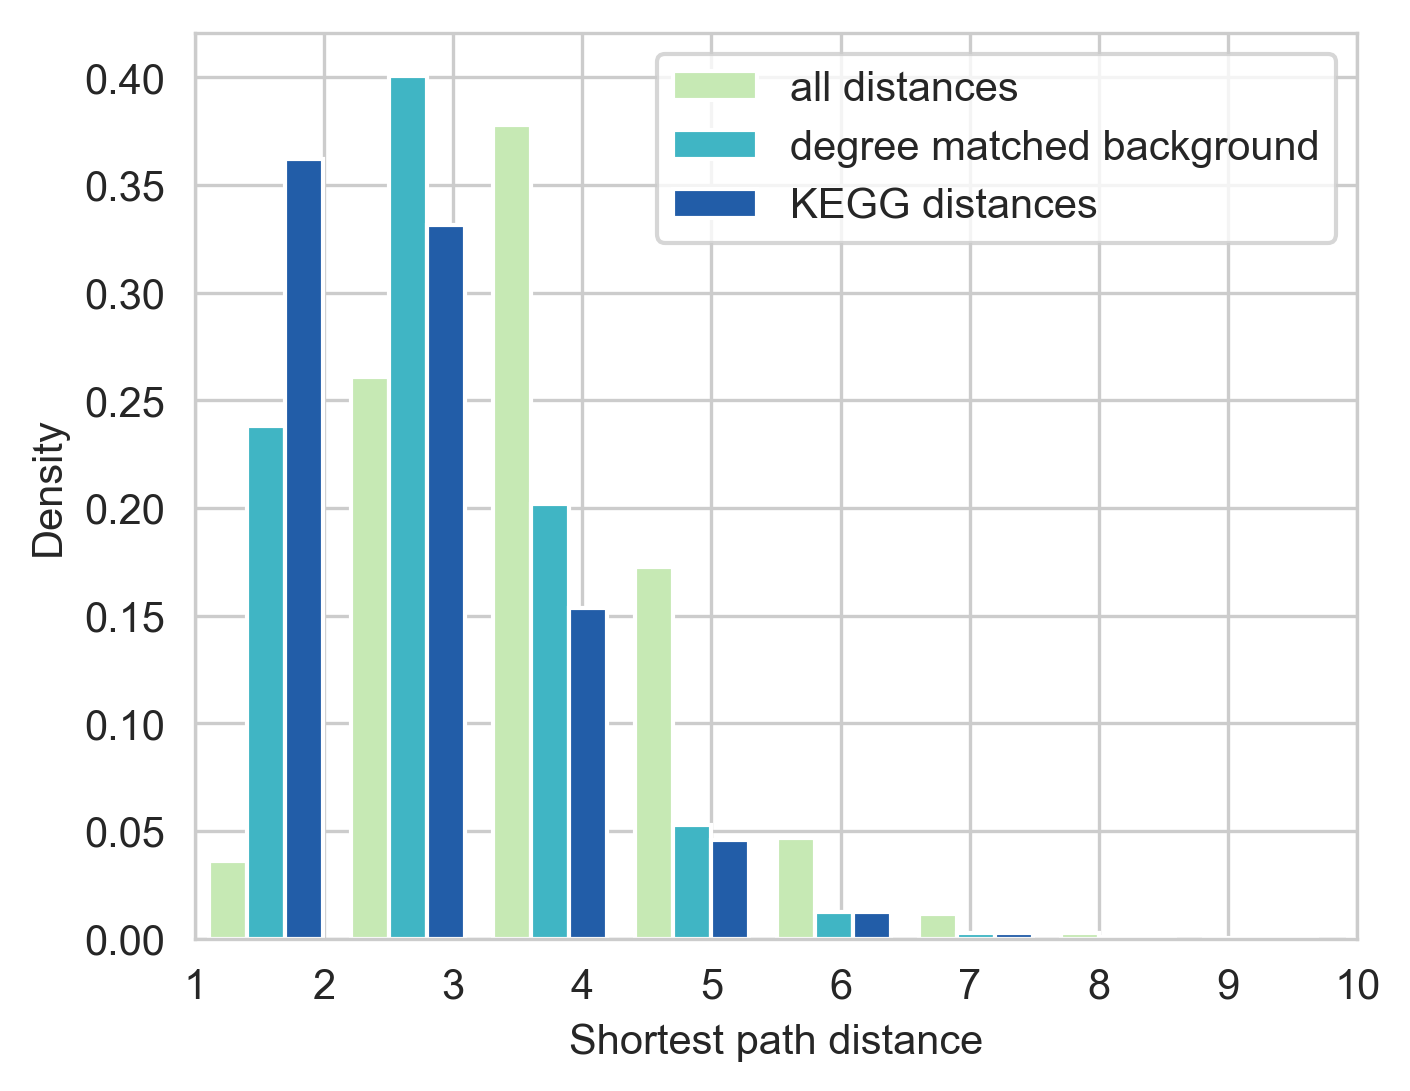

In [124]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148364150091.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=827976822.5, pvalue=0.0)


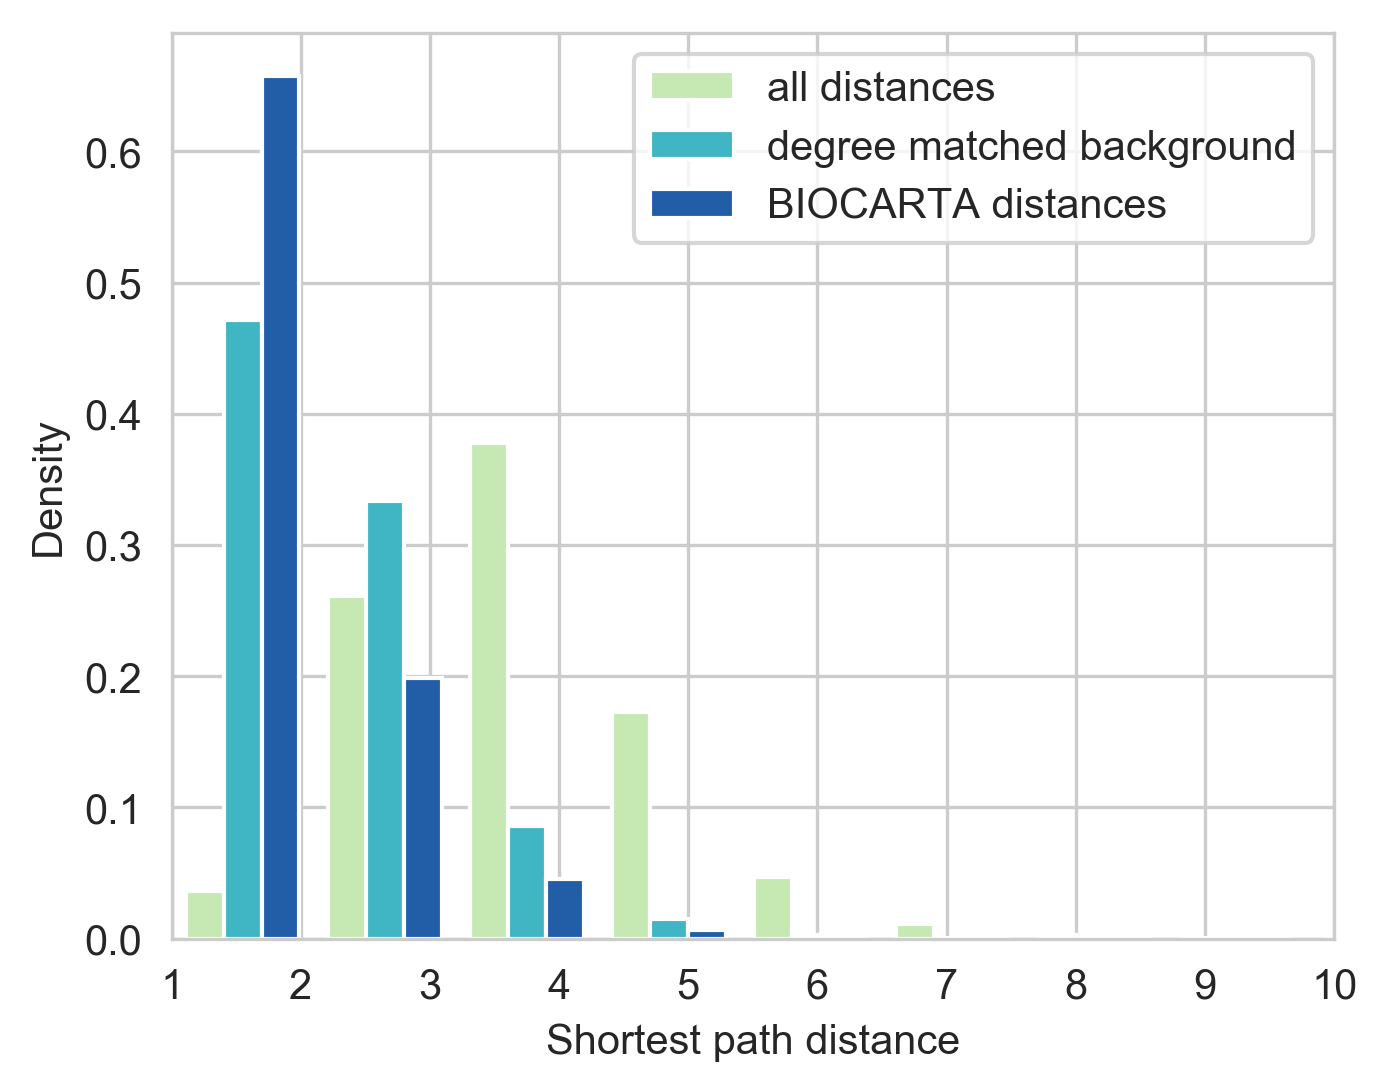

In [128]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12792509248376.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790719361316.5, pvalue=0.0)


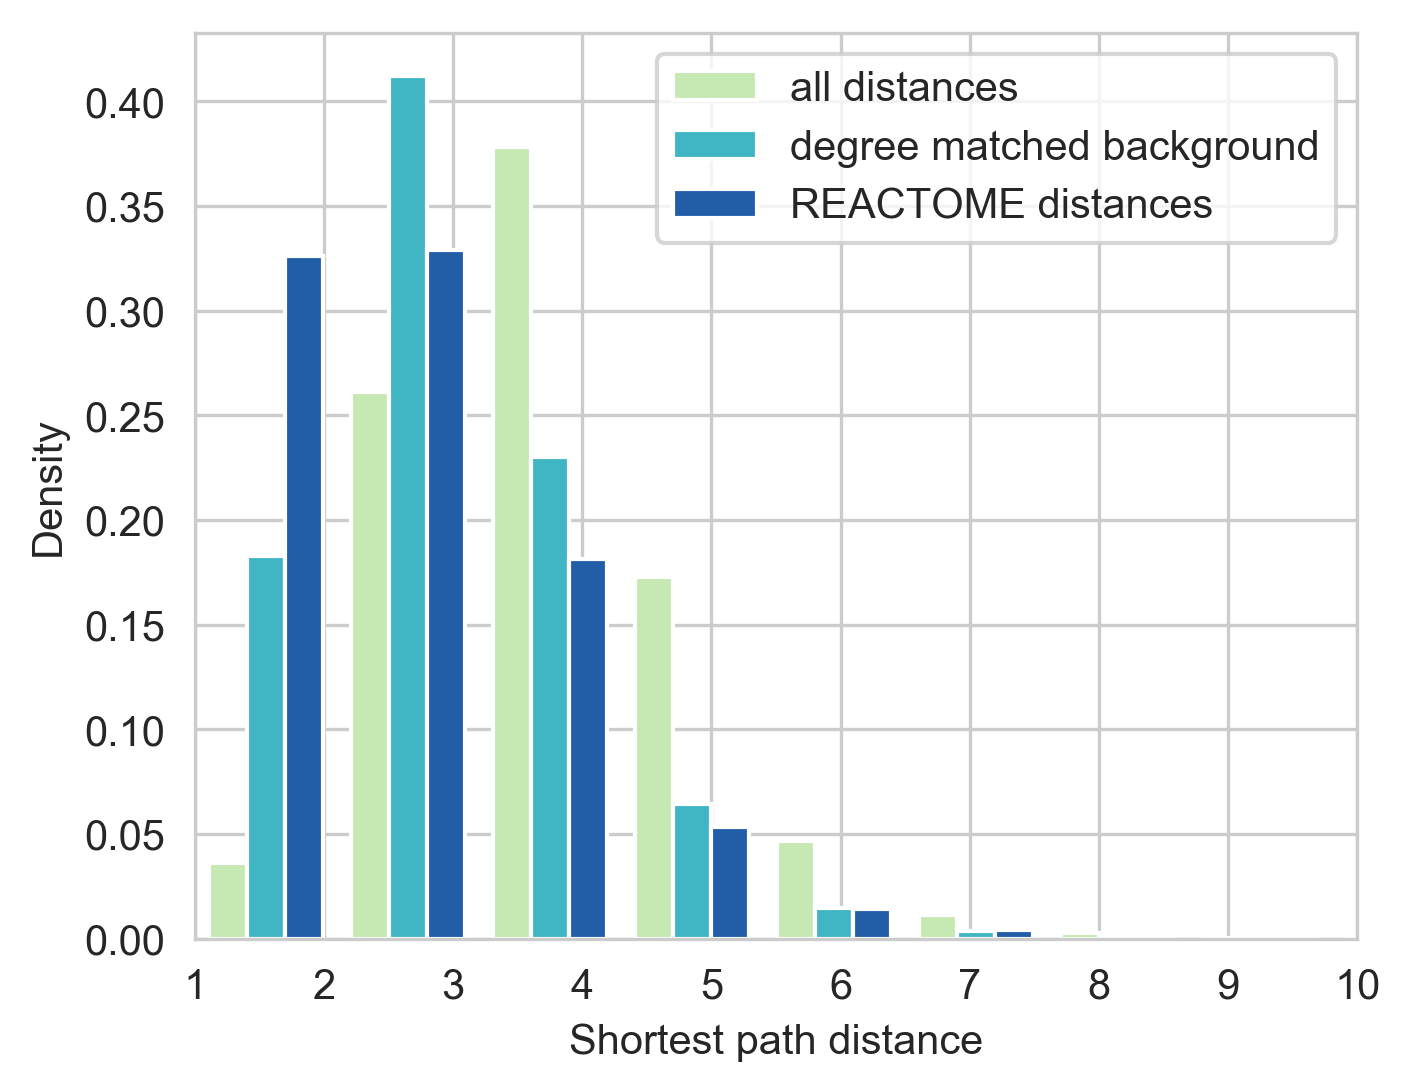

In [129]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62225351048753.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8544221811389.5, pvalue=0.0)


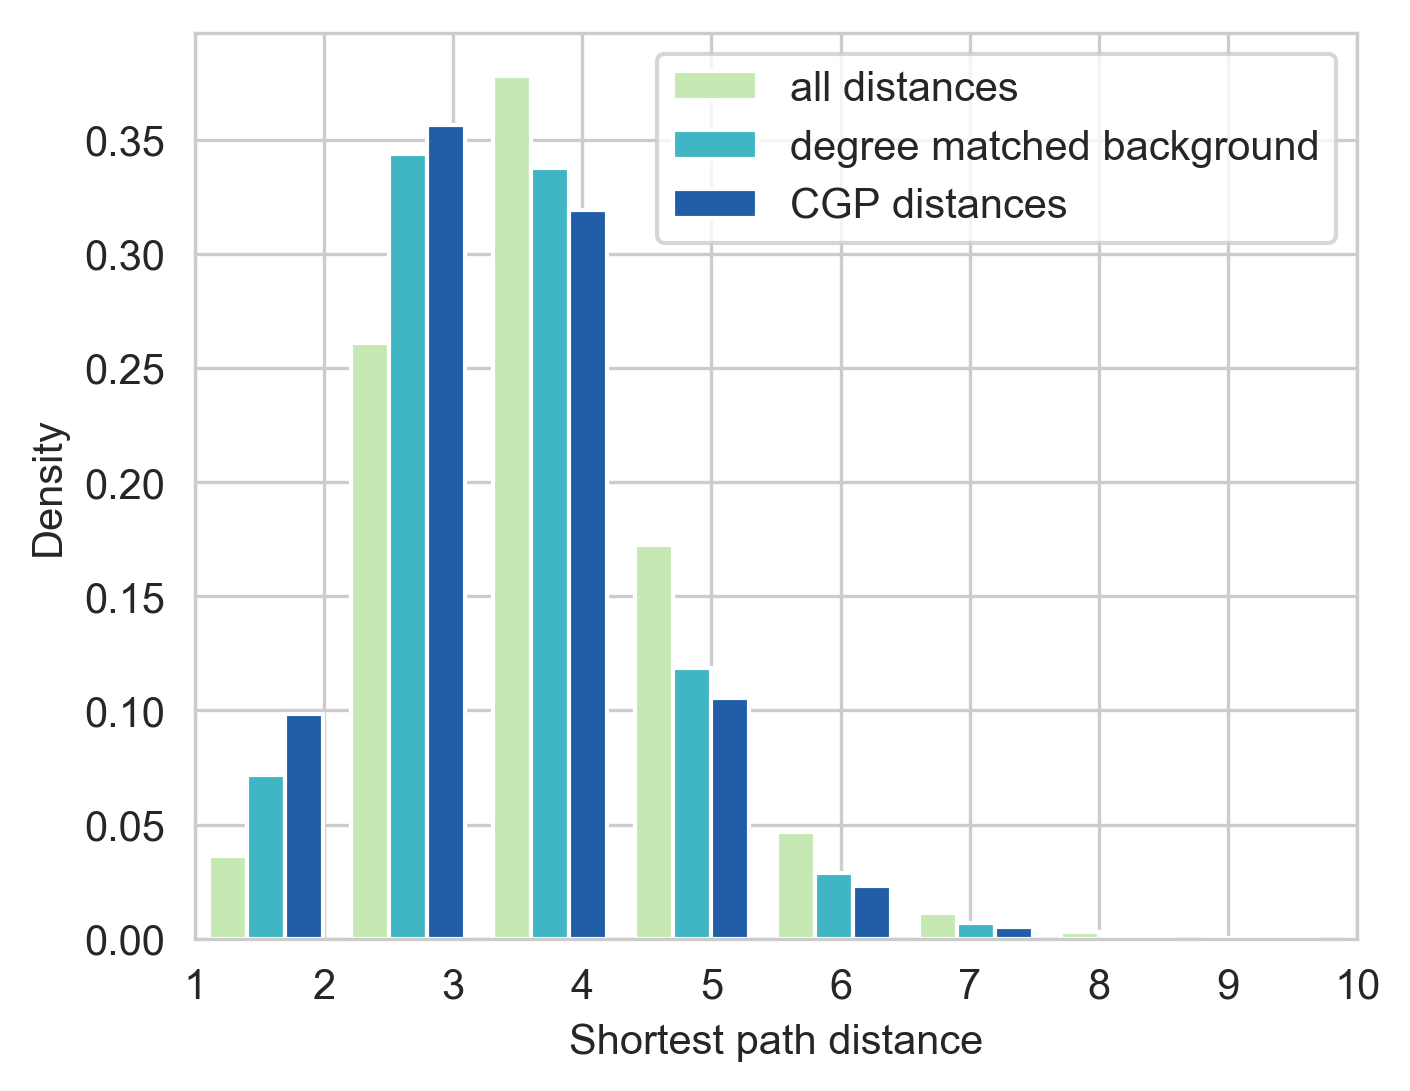

In [130]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')

Benchmark data

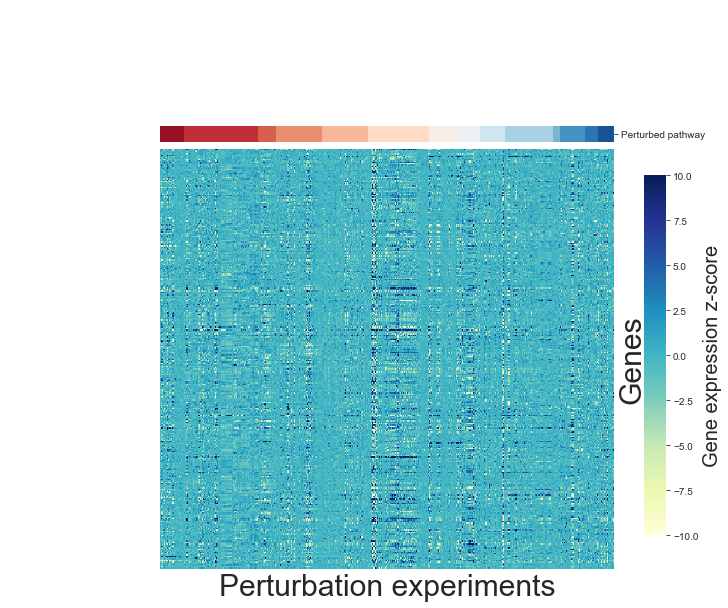

In [138]:
data=pd.read_csv('../results/benchmark/datasets/progeny_data.csv',sep=',',header=0,index_col=0)
data[data<-10]=-10
data[data>10]=10
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
meta.columns=['Perturbed pathway']
col_col=dict(zip(meta['Perturbed pathway'].unique(), sns.color_palette('RdBu',14)))
g=sns.clustermap(data.iloc[:300,],cmap='YlGnBu',col_colors=meta['Perturbed pathway'].map(col_col),
               row_cluster=False,col_cluster=False,
               cbar_pos=(0.9, .25, .03, .5),rasterized=True)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xlabel('Perturbation experiments',size=30)
g.ax_heatmap.set_ylabel('Genes',size=30)
g.ax_cbar.set_ylabel('Gene expression z-score',size=20)
plt.savefig('../figures/raw/Fig3A1.pdf')

In [3]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC

0.8124159685593133 0.588452787258248


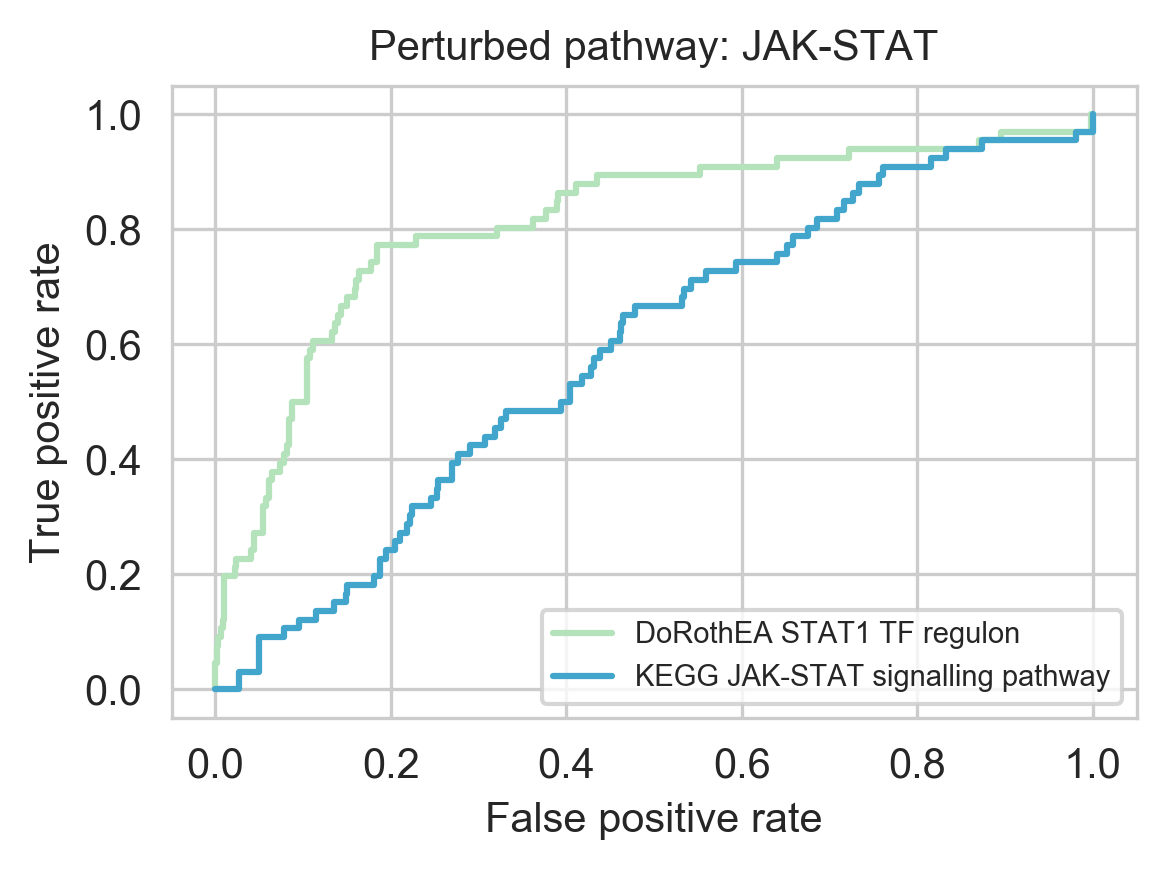

In [8]:
dorothea=pd.read_csv('../results/benchmark/scores/progeny/single/BEST_dorothea_AB_filtered.csv',
                     sep=',',header=0,index_col=0)
kegg=pd.read_csv('../results/benchmark/scores/progeny/single/KEGG_filtered.csv',
                     sep=',',header=0,index_col=0)
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
y_pr1=dorothea.loc['STAT1']
y_pr2=kegg.loc['KEGG_JAK_STAT_SIGNALING_PATHWAY']
y_tr=(meta['pathway']=='JAK-STAT')*1
fpr1,tpr1,th=ROC(y_true=y_tr,y_score=y_pr1)
fpr2,tpr2,th=ROC(y_true=y_tr,y_score=y_pr2)
auc1=AUC(fpr1,tpr1)
auc2=AUC(fpr2,tpr2)
sns.set_palette('GnBu',2)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate',size=10)
plt.ylabel('True positive rate',size=10)
plt.title('Perturbed pathway: JAK-STAT',size=10)
plt.legend(['DoRothEA STAT1 TF regulon','KEGG JAK-STAT signalling pathway'],fontsize=7)
plt.tight_layout()
print(auc1,auc2)
plt.savefig('../figures/raw/Fig3A2.pdf')

0.682987430575855 0.6332943583747442


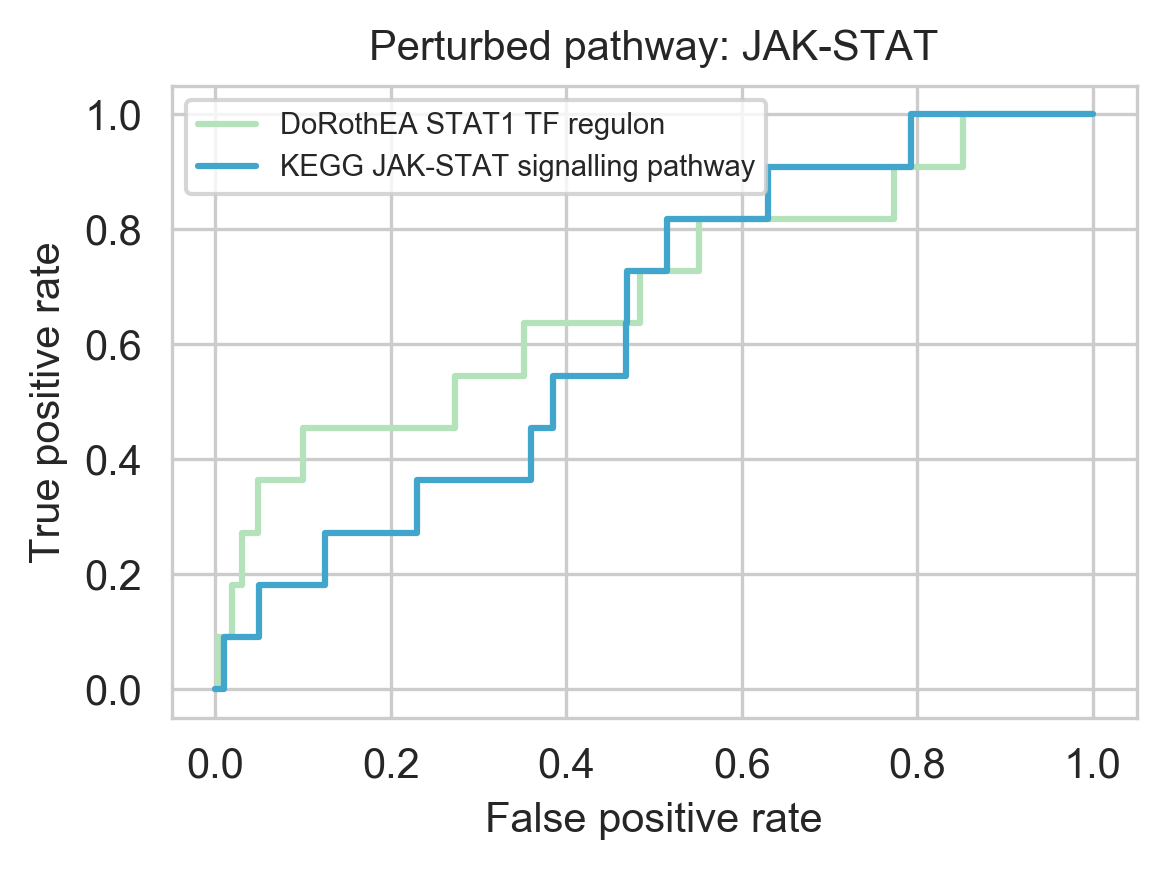

In [28]:
dorothea=pd.read_csv('../results/benchmark/scores/gdsc/single/BEST_dorothea_AB_filtered.csv',
                     sep=',',header=0,index_col=0)
dorothea.columns=pd.Series(dorothea.columns).apply(lambda x:int(x[1:])).values
kegg=pd.read_csv('../results/benchmark/scores/gdsc/single/KEGG_filtered.csv',
                     sep=',',header=0,index_col=0)
kegg.columns=pd.Series(kegg.columns).apply(lambda x:int(x[1:])).values
meta=pd.read_csv('../results/benchmark/datasets/gdsc_mut.csv',sep=',',header=0,index_col=0)
meta.columns=meta.columns.astype(int)
meta=meta[kegg.columns]
y_pr1=dorothea.loc['HIF1A']
y_pr2=kegg.loc['KEGG_RENAL_CELL_CARCINOMA']
y_tr=meta.loc['VHL_mut']*1
fpr1,tpr1,th=ROC(y_true=y_tr,y_score=y_pr1)
fpr2,tpr2,th=ROC(y_true=y_tr,y_score=y_pr2)
auc1=AUC(fpr1,tpr1)
auc2=AUC(fpr2,tpr2)
sns.set_palette('GnBu',2)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate',size=10)
plt.ylabel('True positive rate',size=10)
plt.title('Perturbed pathway: JAK-STAT',size=10)
plt.legend(['DoRothEA STAT1 TF regulon','KEGG JAK-STAT signalling pathway'],fontsize=7)
plt.tight_layout()
print(auc1,auc2)

In [26]:
temp=kegg.T

In [ ]:
temp['KEGG_HISTIDINE_METABOLISM']

In [151]:
data=pd.read_csv('../results/benchmark/z_scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                sep=',',header=0,index_col=0)
data=data.sort_index()

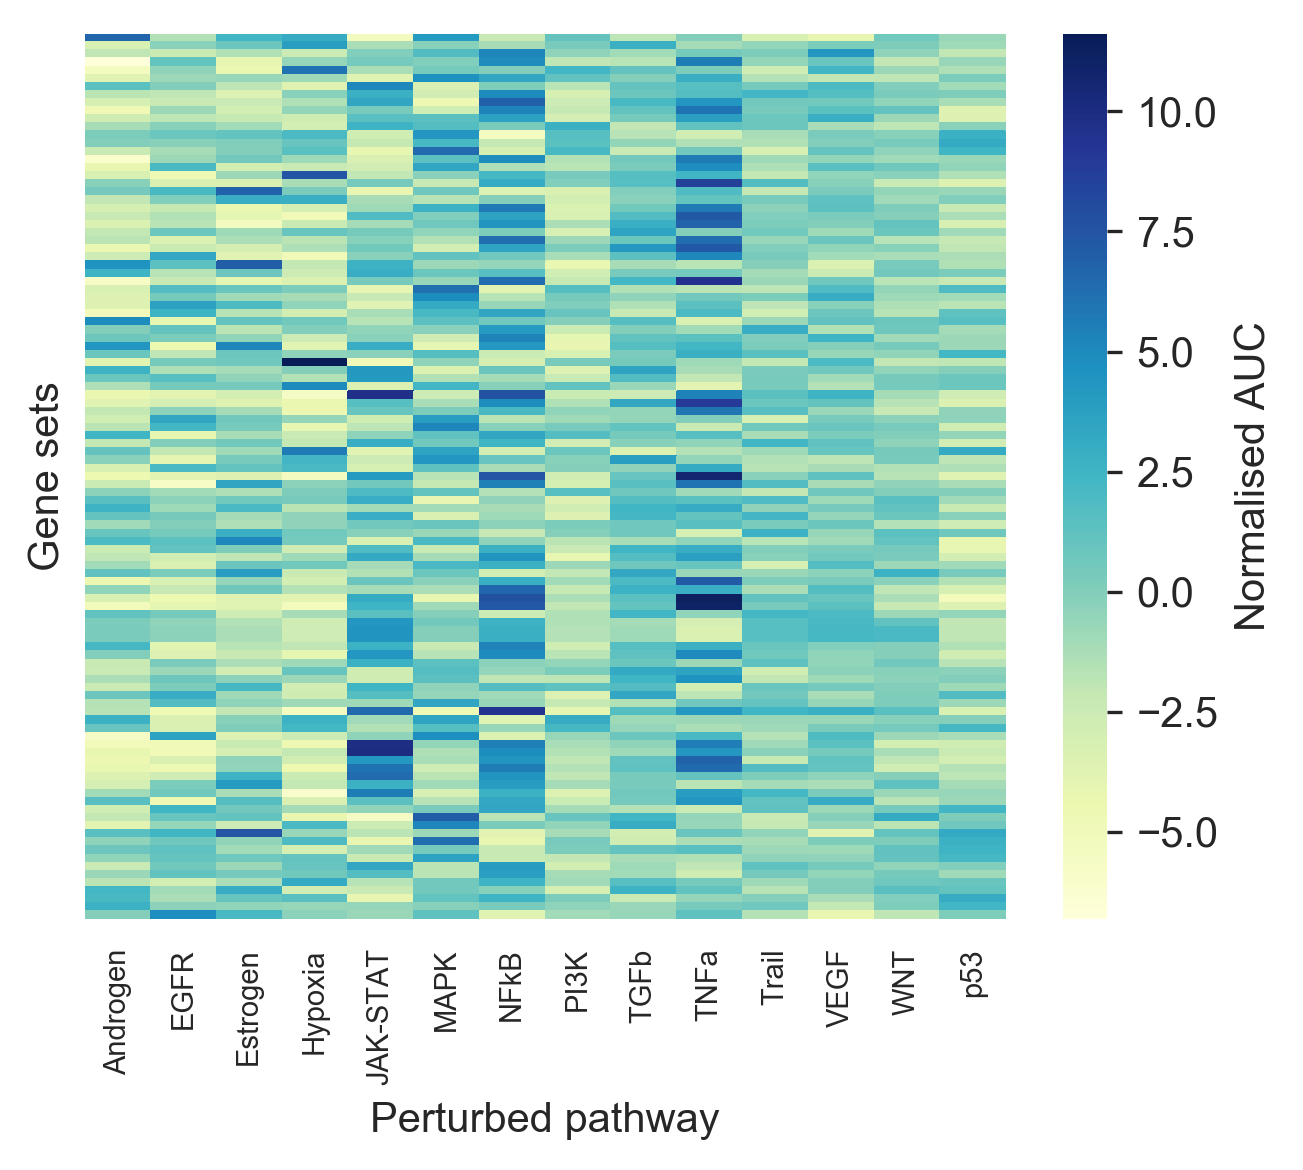

In [152]:
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data.T,cmap='YlGnBu',cbar_kws={'label': 'Normalised AUC'})
plt.xlabel('Perturbed pathway',size=10)
plt.ylabel('Gene sets',size=10)
plt.yticks([])
plt.xticks(size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig3A3.pdf')

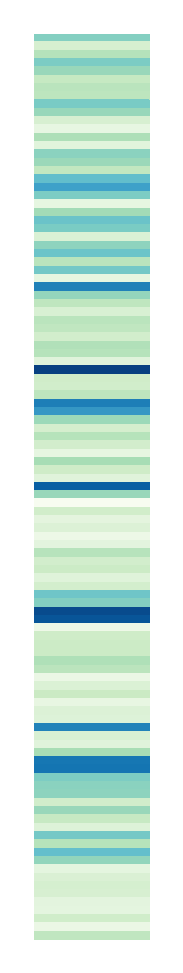

In [153]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.abs().max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig3A4.pdf')

In [1]:
datasets=['BEST_dorothea_AB_filtered','BEST_dorothea_AB_random',
         'BEST_dorothea_CD_filtered','BEST_dorothea_CD_random',
         'BIOCARTA_filtered','BIOCARTA_random',
         'KEGG_filtered','KEGG_random',
         'REACTOME_filtered','REACTOME_random',
         'CGP_filtered','CGP_random']
dnames=['DoRothEA_AB','DoRothEA_CD','BIOCARTA','KEGG','REACTOME','CGP']

In [45]:
def get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs'):
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','CGP','KEGG','BIOCARTA','REACTOME']
    scores=[]
    for fname in datasets:
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,'_filtered',abstype),
                         sep=',',header=0,index_col=0)
        scores+=list(data.values.reshape((1,-1))[0])
    scores=np.array(scores)
    th=np.std(scores)*2.5
    results=pd.DataFrame(columns=['Rtype','Dataset','Informative','Total'])
    for rtype in ['_random','_filtered']:
        for fname in datasets:
            data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,rtype,abstype),
                             sep=',',header=0,index_col=0)
            p=((data.abs()>th).sum(0)>0).sum()
            n=data.shape[1]
            temp=pd.DataFrame(index=[len(results)],columns=results.columns)
            temp.loc[len(results)]=[rtype,fname,p,n]
            results=pd.concat([results,temp])
    results['Prop']=results['Informative']/results['Total']
    results['Non_informative']=results['Total']-results['Informative']
    return results

In [46]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs')

In [67]:
fil=results['Rtype']=='_filtered'
fil1=(results['Dataset']=='REACTOME')&fil
fil2=(results['Dataset']=='CGP')&fil
a=results['Informative'][fil1].sum()
b=results['Informative'][fil2].sum()
c=results['Non_informative'][fil1].sum()
d=results['Non_informative'][fil2].sum()

In [68]:
fisher_exact([[a,b],[c,d]])

(0.5031587040855555, 5.174793319774297e-26)

In [32]:
from scipy.stats import fisher_exact

In [43]:
fisher_exact([[108, 73], [464, 536]])

(1.709022201228153, 0.0011894290971459303)

In [45]:
def plot_informative_score(benchmark='progeny',add_abs=True,final_name='Fig3B'):
    results=pd.DataFrame(columns=['Database','Random','Setname','Score'])
    for i in range(len(datasets)):
        fname=datasets[i]
        if add_abs:
            fname+='_abs.csv'
        else:
            fname+='.csv'
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s' % (benchmark,fname) ,sep=',',header=0,index_col=0)
        data=pd.DataFrame(data.abs().max())
        data['Database']=dnames[i//2]
        if (i%2)==0:
            data['Random']='Real'
        else:
            data['Random']='Random'
        data['Setname']=data.index
        data.columns=['Score','Database','Random','Setname']
        data=data[results.columns]
        results=pd.concat([results,data])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',2)
    sns.boxplot(x='Database',y='Score',hue='Random',data=results)
    plt.legend(loc=1)
    plt.xticks(rotation=45)
    plt.ylabel('Gene set informative score\n(normalised AUC)')
    plt.tight_layout()
    plt.savefig('../figures/raw/'+final_name+'.pdf')
    results.to_csv('../results/benchmark/'+final_name+'.csv',sep=',')

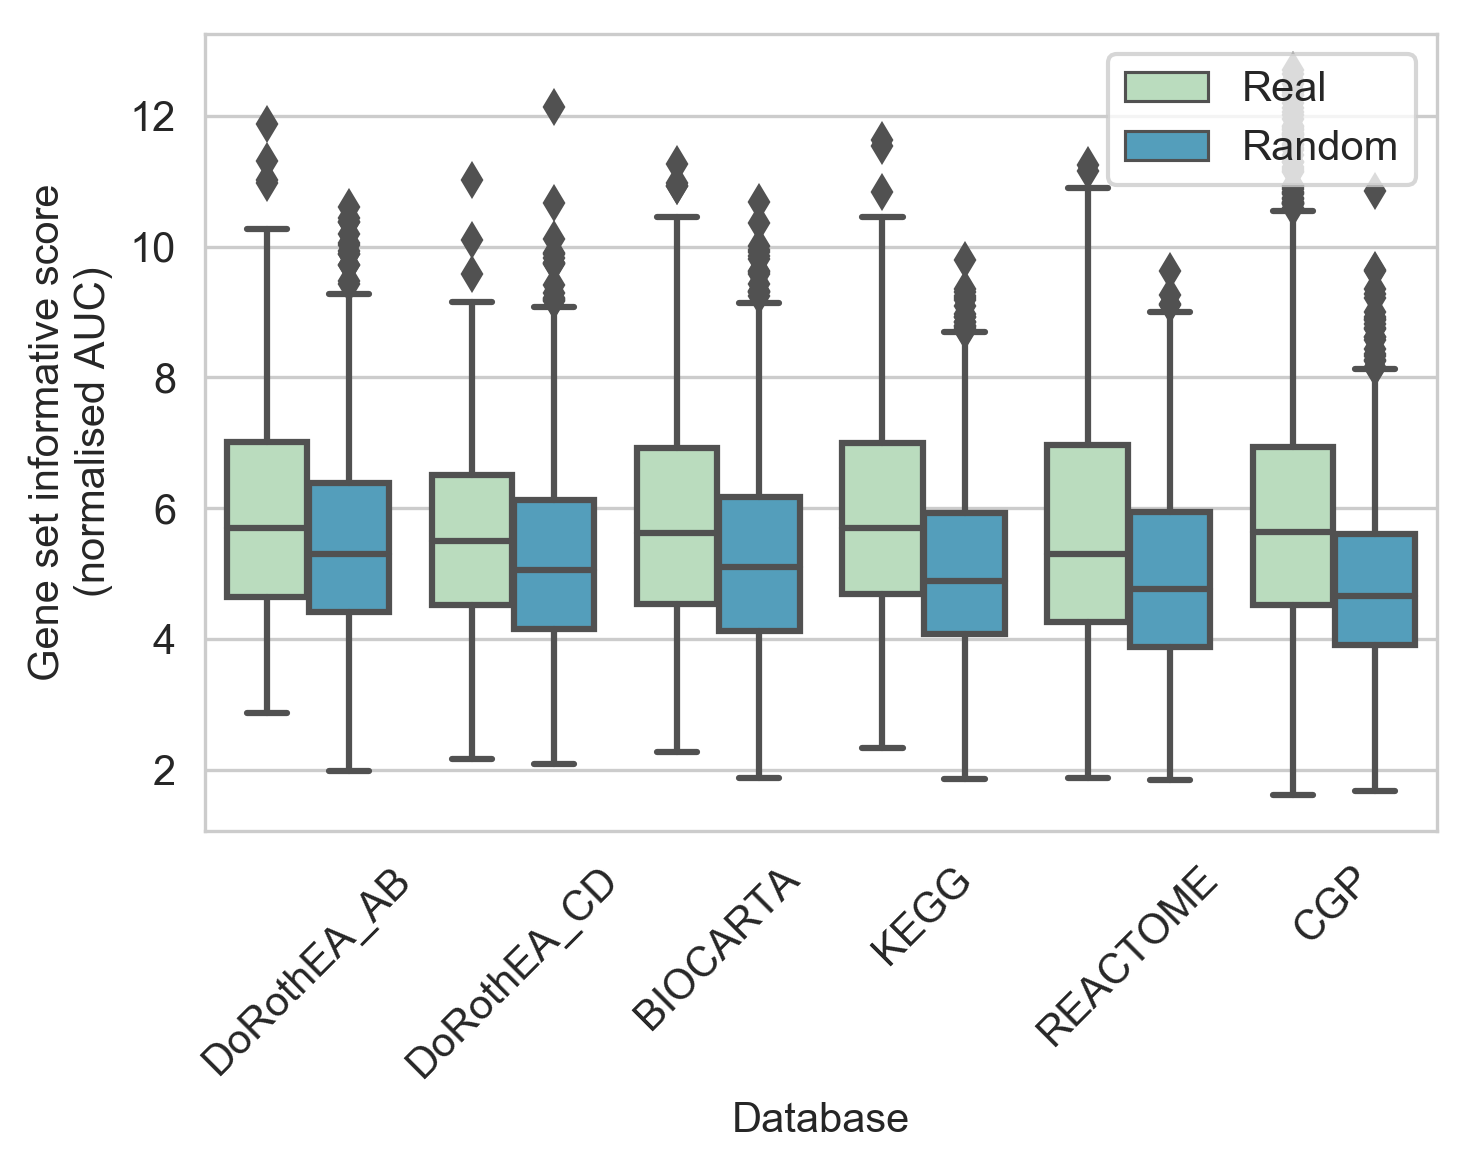

In [49]:
plot_informative_score(benchmark='progeny',add_abs=False,final_name='Fig3B')

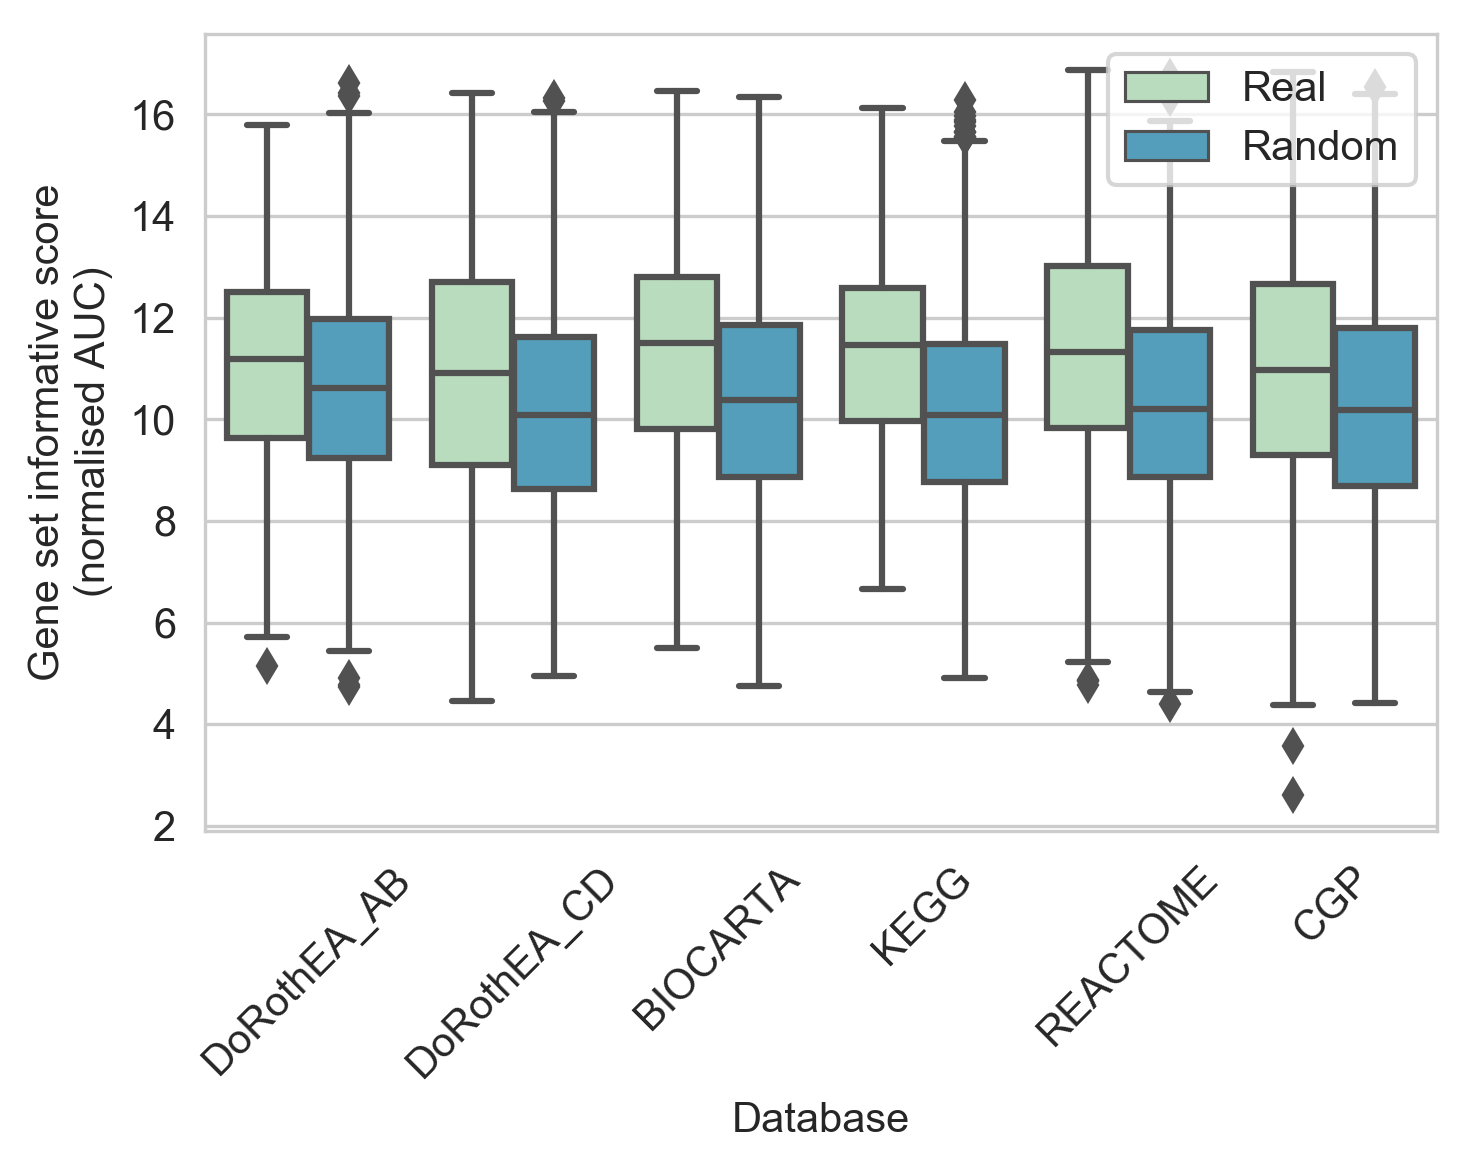

In [48]:
plot_informative_score(benchmark='tcga',add_abs=False,final_name='Fig3C')

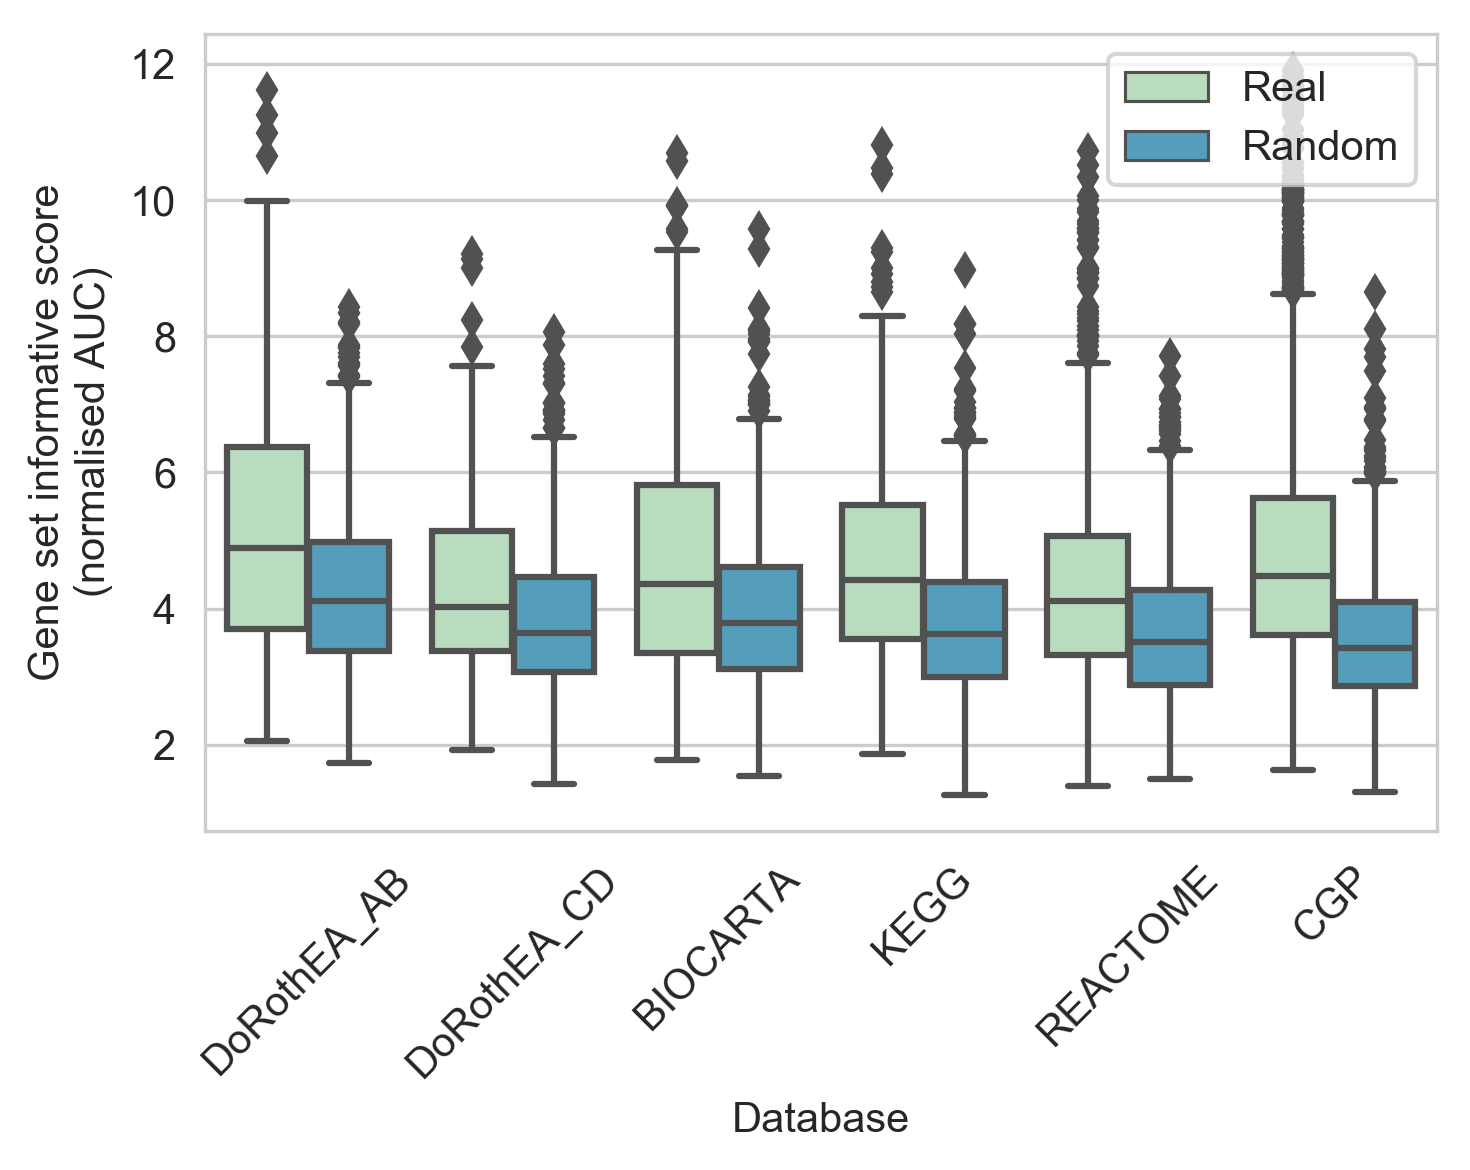

In [50]:
plot_informative_score(benchmark='progeny',add_abs=True,final_name='SFig4A')

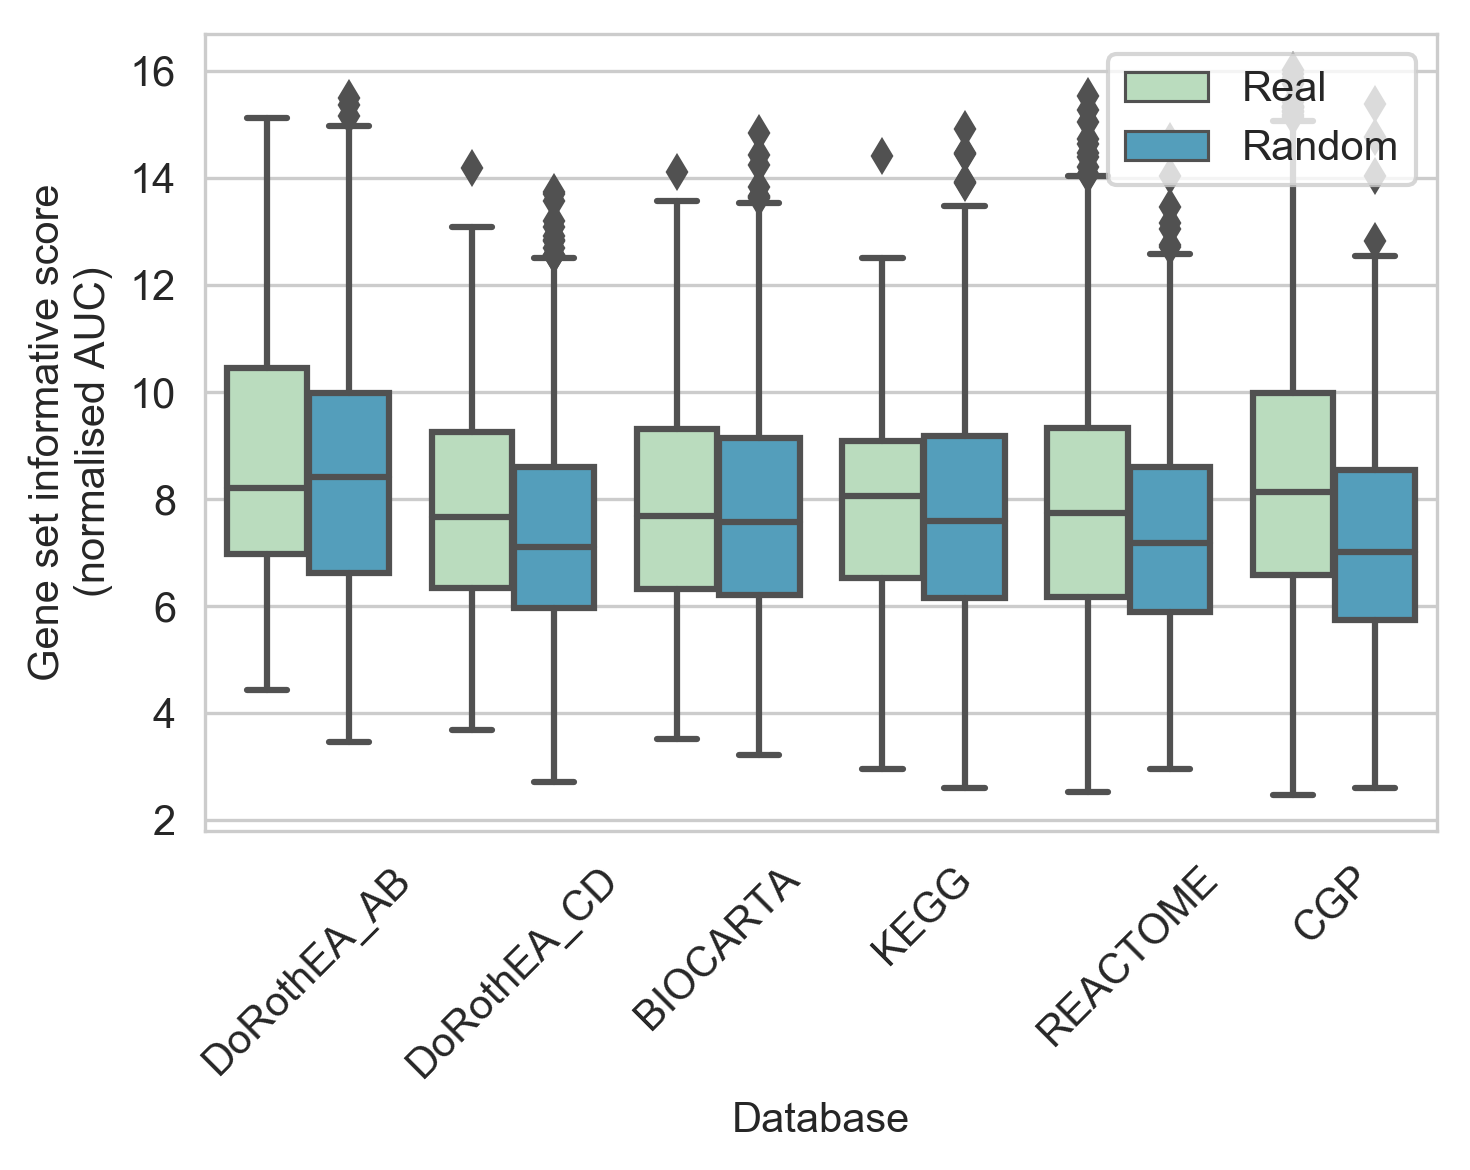

In [51]:
plot_informative_score(benchmark='tcga',add_abs=True,final_name='SFig4B')

In [138]:
fname='BIOCARTA_random'

In [139]:
data1=pd.read_csv('../results/benchmark/scores/progeny/single/'+fname+'.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
data2=pd.read_csv('../results/benchmark/scores/tcga/single/'+fname+'.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
sets=list(set(data1.index)&set(data2.index))
data1=data1[sets]
data2=data2[sets]

In [7]:
datasets=['BEST_dorothea_AB_filtered','BEST_dorothea_AB_random',
         'BEST_dorothea_CD_filtered','BEST_dorothea_CD_random',
         'BIOCARTA_filtered','BIOCARTA_random',
         'KEGG_filtered','KEGG_random',
         'REACTOME_filtered','REACTOME_random',
         'CGP_filtered','CGP_random']
datasets=pd.Series(0.0,index=datasets)

In [8]:
for fname in datasets.index:
    data1=pd.read_csv('../results/benchmark/scores/tcga/single/'+fname+'.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
    data2=pd.read_csv('../results/benchmark/scores/tcga/single/'+fname+'_abs.csv',
                      sep=',',header=0,index_col=0).abs().max(1)
    sets=list(set(data1.index)&set(data2.index))
    data1=data1[sets]
    data2=data2[sets]
    datasets[fname]=pcor(data1,data2)[0]

In [9]:
datasets

BEST_dorothea_AB_filtered    0.903918
BEST_dorothea_AB_random      0.799372
BEST_dorothea_CD_filtered    0.818630
BEST_dorothea_CD_random      0.355697
BIOCARTA_filtered            0.870252
BIOCARTA_random              0.439100
KEGG_filtered                0.940573
KEGG_random                  0.458020
REACTOME_filtered            0.908598
REACTOME_random              0.269856
CGP_filtered                 0.926462
CGP_random                   0.126301
dtype: float64

([<matplotlib.axis.YTick at 0x121d37b70>,
 <a list of 12 Text yticklabel objects>)

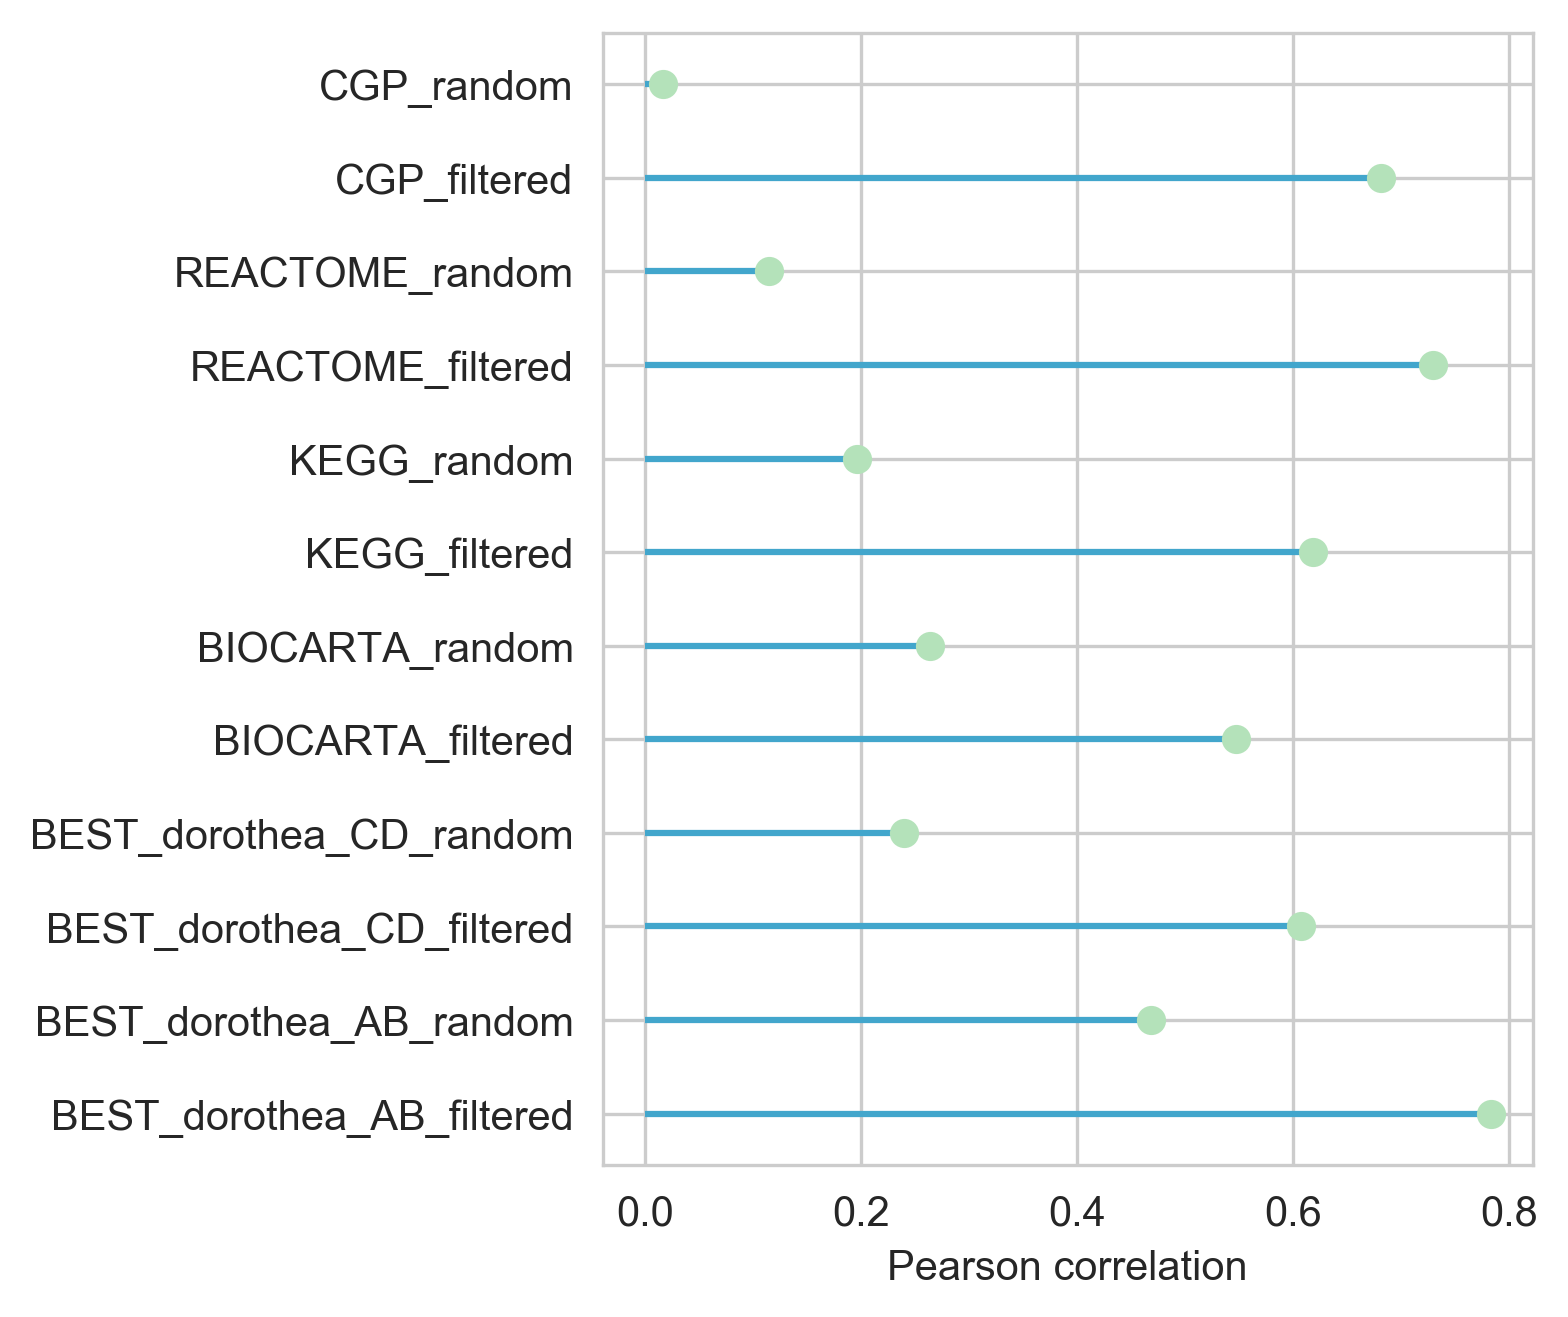

In [157]:
plt.figure(figsize=(4,5),dpi=300)
colors=sns.color_palette('GnBu',2)
plt.hlines(y=range(1,len(datasets)+1), xmin=0, xmax=datasets,colors=colors[1])
plt.plot(datasets, range(1,len(datasets)+1), "o")
plt.xlabel('Pearson correlation')
plt.yticks(range(1,len(datasets)+1),datasets.index)


In [20]:
def plot_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type,name1,name2):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    colors=sns.color_palette('GnBu',2)
    f,axs=plt.subplots(1,2,figsize=(8,4),dpi=300)
    sns.regplot(similarity1,activity1,ax=axs[0],color=colors[0])
    axs[0].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name1,name2))
    axs[0].set_ylabel('Informative score of %s gene sets' % name1)

    sns.regplot(similarity2,activity2,ax=axs[1],color=colors[1])
    axs[1].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name2,name1))
    axs[1].set_ylabel('Informative score of %s gene sets' % name2)
    print(pcor(similarity1,activity1))
    print(pcor(similarity2,activity2))
    plt.tight_layout()

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.0048417442970924065, 0.9601488398134338)
(0.32962057881637913, 1.8103658264953674e-08)


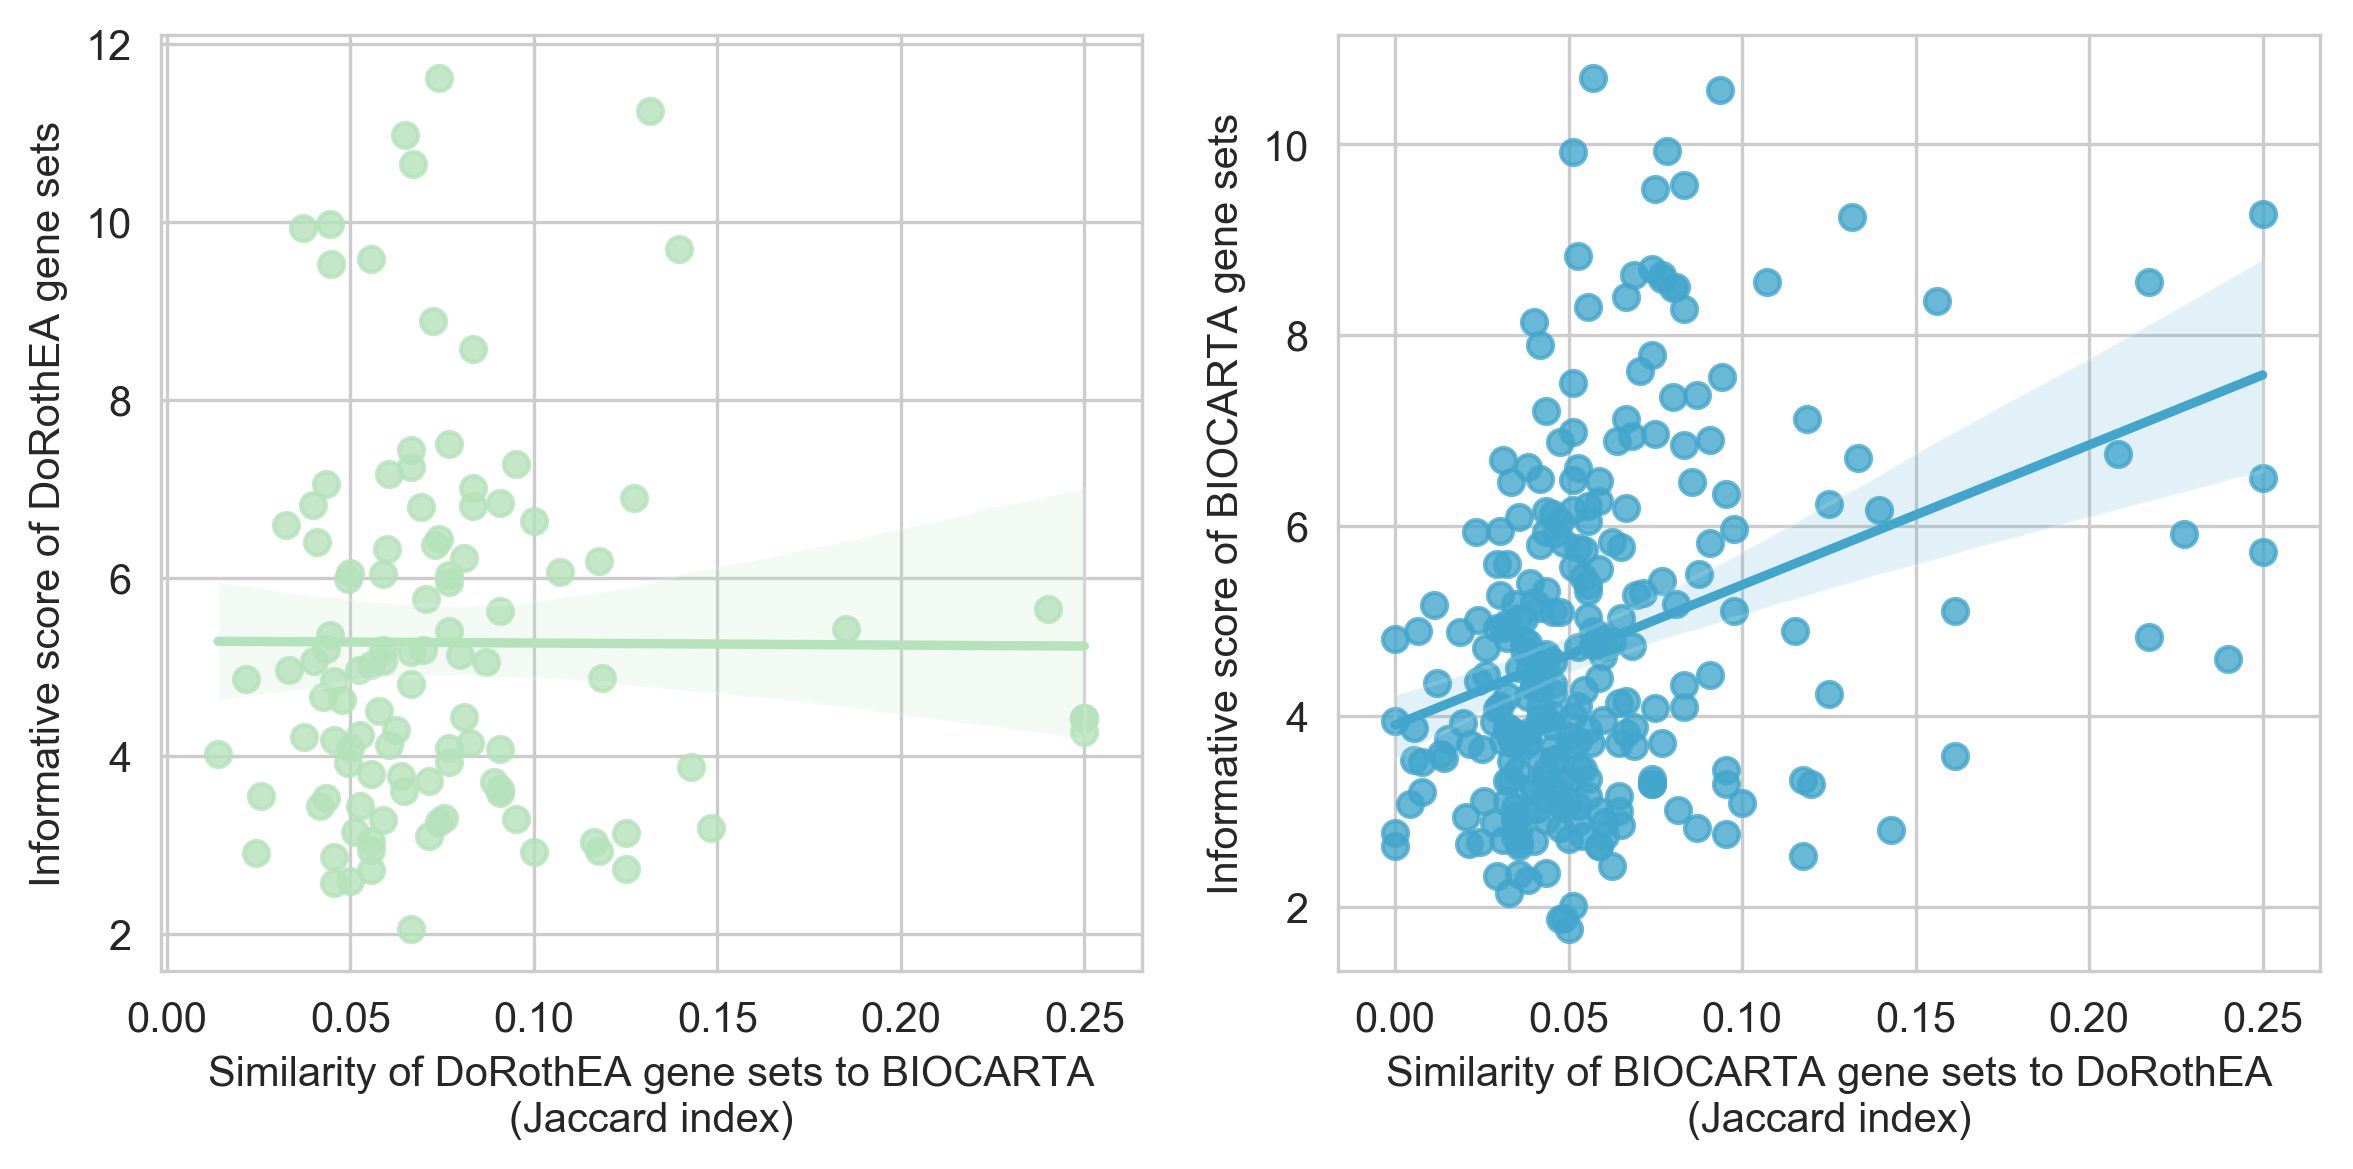

In [21]:
plot_correaltions('BEST_dorothea_AB','BIOCARTA','_abs','_filtered','progeny','jaccard',
                  'DoRothEA','BIOCARTA')
plt.savefig('../figures/raw/Fig4A.pdf')